# Premessa

L'analisi di questo set di dati (https://www.kaggle.com/datasets/yugagrawal95/sample-media-spends-data) avrebbe potuto concludersi con un semplice grafico di correlazione (Heatmap), a causa della mancanza di dati fondamentali come il costo e la quantità settimanale per generare ogni tipo di engagement, queste mancanze mi hanno spinto a scegliere di sviluppare un'analisi con un focus temporale, piuttosto che economico. Questa scelta è stata dettata dalla necessità di comprendere meglio il comportamento delle variabili nel tempo, dato che non avevo a disposizione informazioni cruciali per un'analisi economica accurata.

Inoltre, il dataset presenta delle lacune anche nelle descrizioni delle colonne, in particolare riguardo a dettagli importanti come il tipo di piattaforma, il tipo di contenuto e le tipologie di pubblicità. Queste mancanze hanno reso impossibile una comprensione completa delle dinamiche di costo e rendimento, spingendomi quindi a concentrarmi maggiormente sulle correlazioni temporali.

Nonostante queste limitazioni, l'analisi ha evidenziato correlazioni molto forti tra le vendite e le impressions di Google, Email e Facebook su una finestra temporale annuale. Le altre variabili, invece, mostrano correlazioni più deboli o limitate a periodi specifici, suggerendo che il loro impatto è significativo solo in determinati momenti dell'anno.

In sintesi, questa analisi, pur non avendo un taglio economico a causa delle carenze nel dataset, fornisce comunque indicazioni utili sulla tempistica ottimale delle attività di marketing, evidenziando come sfruttare i periodi di maggiore impatto delle singole metriche per massimizzare i ritorni sulle vendite.

&nbsp;

# Importo le librerie principali

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# Impostare Pandas per visualizzare l'output completo
pd.set_option('display.max_columns', None)  # Mostra tutte le colonne
pd.set_option('display.width', 1000)  # Imposta una larghezza complessiva maggiore
pd.set_option('display.max_rows', None)  # Mostra tutte le righe

# Creo un dataframe leggendo il file csv o se non precedentemente scaricato, lo leggo momentaneamente

##  Per leggere il file in modo momentaneo:
- Commentare la riga di codice 'df = pd.read_csv('Sample Media Spend Data.csv')' e quella successiva, poi scommentare tutte le altre e poi eseguire la cella.

In [10]:
# import kagglehub
# import os

# # Step 1: Scarica l'ultima versione del dataset
# path = kagglehub.dataset_download("yugagrawal95/sample-media-spends-data")

# # Verifica il percorso dei file scaricati
# print("Path to dataset files:", path)

# # Step 2: Esplorare la cartella per vedere i file contenuti
# files_in_directory = os.listdir(path)
# print("File nella directory:", files_in_directory)

# # Step 3: Trova il file CSV nella cartella scaricata
# # Se ci sono più file, scegli il nome del file CSV
# csv_file = None
# for file in files_in_directory:
#     if file.endswith('.csv'):
#         csv_file = file
#         break  # Uscire dal ciclo una volta trovato il primo file CSV

# # Se troviamo un file CSV, procediamo a caricarlo
# if csv_file:
#     file_path = os.path.join(path, csv_file)  # Combina il percorso e il nome del file
#     print(f"Caricando il file: {file_path}")  # Stampa il percorso completo del file
#     df = pd.read_csv(file_path)
#     print("DataFrame creato correttamente.")  # Visualizza le prime righe del DataFrame
# else:
#     print("Nessun file CSV trovato nella cartella.")



# Leggo il csv precedentemente scaricato creando un dataframe df
df = pd.read_csv('Sample Media Spend Data.csv') # Fonte: https://www.kaggle.com/datasets/yugagrawal95/sample-media-spends-data
print("DataFrame creato correttamente.")

DataFrame creato correttamente.


In [5]:
# Analizzo le colonne tramite una funzione che mi smista le colonne numeriche da quelle categoriche 
# Converto la colonna 'Calendar_Week' in formato data
# Creo una nuova colonna 'Month' contentente il mese in base alla colonna 'Calendar_Week'

# Creo la funzione get_num_cat_columns(df) che tramite un df in input restituisce le colonne numeriche e categoriche
def get_num_cat_columns(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    num = df.select_dtypes(include=numerics).columns.to_list()
    cat = df.select_dtypes(include=['object', 'datetime']).columns.to_list()
    return num, cat

# Eseguo la funzione get_num_cat_columns(df) sul mio dataframe df assegnandolo a due variabile
numeric_columns, categorical_columns  = get_num_cat_columns(df)
#Printo le variabili
print('Numeric:', numeric_columns,'\nCategorical:', categorical_columns)

# Converto la colonna Calendar_Week da stringa a valore datetime
df['Calendar_Week'] = pd.to_datetime(df['Calendar_Week'], errors='coerce')
# Creo una colonna che in basea alla colonna Clendar_Week ne definisce il mese
df['Month'] = df['Calendar_Week'].dt.month_name()

# Dò un primo sguardo alle prime righe del df
df.head()

Numeric: ['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Overall_Views', 'Sales'] 
Categorical: ['Division', 'Calendar_Week']


Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  Facebook_Impressions  Affiliate_Impressions  Overall_Views  Sales     Month
0        A    2018-01-06         392            422                 408        349895.0107                 73580                  12072            682  59417   January
1        A    2018-01-13         787            904                 110        506270.2176                 11804                   9499            853  56806   January
2        A    2018-01-20          81            970                 742        430042.1538                 52232                  17048            759  48715   January
3        A    2018-01-27          25            575                  65        417745.6658                 78640                  10207            942  72047   January
4        A    2018-02-03         565            284                 295        408505.8012                 40561                   5834            658  56235  February

In [6]:
# Analizzo le varie informazioni del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               3051 non-null   object        
 1   Calendar_Week          3051 non-null   datetime64[ns]
 2   Paid_Views             3051 non-null   int64         
 3   Organic_Views          3051 non-null   int64         
 4   Google_Impressions     3051 non-null   int64         
 5   Email_Impressions      3051 non-null   float64       
 6   Facebook_Impressions   3051 non-null   int64         
 7   Affiliate_Impressions  3051 non-null   int64         
 8   Overall_Views          3051 non-null   int64         
 9   Sales                  3051 non-null   int64         
 10  Month                  3051 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 262.3+ KB


In [4]:
# Controllo che per ogni colonna se ci sono e la quantità di valori nan
df.isnull().sum()

Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
Month                    0
dtype: int64

In [5]:
# Controllo che non ci siano casi duplicati ritornando il numero totale di righe duplicate
df.duplicated().sum()

# Se ci fossero stai dei duplicati sarebbero stati tolti con
#df = df.drop_duplicates(ignore_index=True)

0

In [6]:
# Esploro le statistiche descrittive dei dati numerici nel DataFrame df.
df.describe().round(2)

Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  Facebook_Impressions  Affiliate_Impressions  Overall_Views      Sales
count                 3051     3051.00        3051.00             3051.00            3051.00               3051.00                3051.00        3051.00     3051.0
mean   2019-02-02 00:00:00    15093.94       13355.67           886173.83          760509.38             269126.89               22910.90       27980.91   185901.4
min    2018-01-06 00:00:00        1.00           1.00                7.00           40894.45                 29.00                 910.00           2.00    15436.0
25%    2018-07-21 00:00:00      537.00         712.50           169828.00          378496.92              57073.50                9127.00         747.00    73393.5
50%    2019-02-02 00:00:00     2699.00        4110.00           490531.00          590970.80             127523.00               16658.00        7879.00   113573.0
75%    2019-08-17 00:00:00    17358.00       16230.50          1022621.50          962246.61             283505.00               27486.50       34111.50   202975.5
max    2020-02-29 00:00:00   518190.00      270453.00         17150439.00         7317730.25            7558435.00              175791.00      635057.00  3575430.0
std                    NaN    30785.88       24079.40          1355075.82          626014.12             466511.67               21617.64       52054.98   232207.9

In [7]:
# Osservo e analizzo le varie correlazioni in cerca di qualche correlazione interessante
df[df.columns[1:10]].corr().round(2)

Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  Facebook_Impressions  Affiliate_Impressions  Overall_Views  Sales
Calendar_Week                   1.00        0.40           0.51                0.23              -0.03                  0.29                  -0.22           0.47   0.16
Paid_Views                      0.40        1.00           0.80                0.31               0.29                  0.32                   0.22           0.96   0.29
Organic_Views                   0.51        0.80           1.00                0.43               0.34                  0.41                   0.23           0.93   0.39
Google_Impressions              0.23        0.31           0.43                1.00               0.64                  0.73                   0.35           0.38   0.78
Email_Impressions              -0.03        0.29           0.34                0.64               1.00                  0.52                   0.70           0.33   0.75
Facebook_Impressions            0.29        0.32           0.41                0.73               0.52                  1.00                   0.29           0.38   0.75
Affiliate_Impressions          -0.22        0.22           0.23                0.35               0.70                  0.29                   1.00           0.23   0.44
Overall_Views                   0.47        0.96           0.93                0.38               0.33                  0.38                   0.23           1.00   0.35
Sales                           0.16        0.29           0.39                0.78               0.75                  0.75                   0.44           0.35   1.00

# Creo un grafico Heatmap per visualizzare meglio le correlazioni

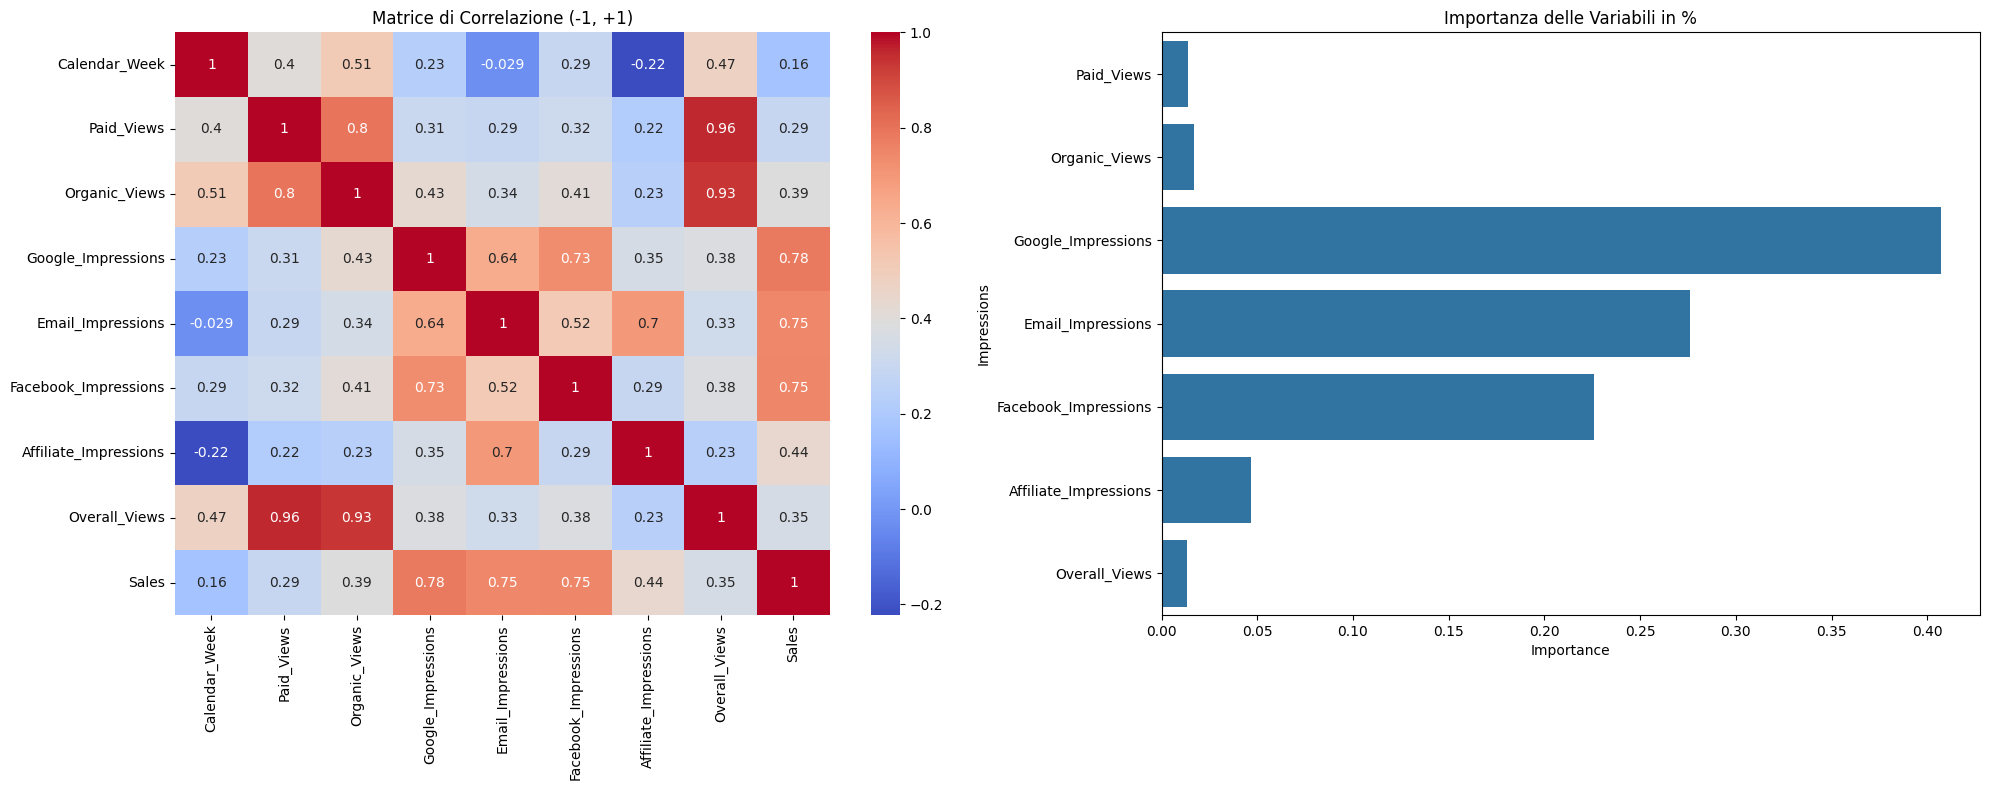

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Creazione di un layout con 2 celle (1 riga e 2 colonne)
plt.figure(figsize=(20, 8))  # Imposta la dimensione complessiva della figura (12x6 pollici)

# Prima cella (sinistra): Heatmap della matrice di correlazione
plt.subplot(1, 2, 1)  # Indica che questo grafico sarà posizionato nella prima colonna della griglia (1 riga, 2 colonne)
# Calcola e disegna la heatmap della matrice di correlazione sulle colonne selezionate (1-9 escluso il primo)
sns.heatmap(df[df.columns[1:10]].corr(), annot=True, cmap="coolwarm")
# Imposta il titolo per la heatmap
plt.title('Matrice di Correlazione (-1, +1)')

# Seconda cella (destra): Importanza delle variabili
plt.subplot(1, 2, 2)  # Indica che questo grafico sarà posizionato nella seconda colonna della griglia (1 riga, 2 colonne)
# Seleziona le colonne di input (variabili indipendenti) e la variabile target (Sales)
X = df[df.columns[2:9]].dropna()  # Seleziona le colonne per X (indipendenti) e rimuove i valori NaN
y = df['Sales'].dropna()  # Seleziona la colonna 'Sales' per y (target) e rimuove i valori NaN

# Crea un modello di regressione Random Forest
model = RandomForestRegressor()
# Allena il modello sui dati selezionati
model.fit(X, y)

# Estrai l'importanza delle variabili (features) dal modello allenato
feature_importance = pd.DataFrame({'Impressions': X.columns, 'Importance': model.feature_importances_})
# Crea un grafico a barre per visualizzare l'importanza delle variabili
sns.barplot(x='Importance', y='Impressions', data=feature_importance)
# Imposta il titolo per il grafico dell'importanza delle variabili
plt.title('Importanza delle Variabili in %')

# Ottimizza il layout per evitare sovrapposizioni tra i grafici
plt.tight_layout()
# Mostra il grafico combinato con le due celle
plt.show()


# Spiegazione del grafico precedente

### **Quali sono le colonne correlate fra di loro? E di quanto?**

### **Come possiamo vedere dalle varie intensità di colore nella heatmap, alcune colonne hanno una correlazione molto alta fra loro.**

- **Overall_views** è altamente correlato con **Paid_views** (0.96) e **Organic_views** (0.93).
- **Paid_views** e **Organic_views** sono altamente correlati (0.80).
- **Sales** è moderatamente correlato con **Google_impressions** (0.78), **Email_impressions** (0.75) e **Facebook_impressions** (0.75).
- **Google_impressions** e **Facebook_impressions** sono moderatamente correlati (0.73).
- **Affiliate_impressions** e **Email_impressions** sono moderatamente correlati (0.70).
- **Google_impressions** e **Email_impressions** sono moderatamente correlati (0.64).

### **Per questa analisi, la colonna più importante da considerare è **Sales**, che ha correlazioni moderate con:**
- **Google_impressions** (0.78),
- **Email_impressions** (0.75),
- **Facebook_impressions** (0.75).

### **Il resto delle colonne ha correlazioni lievi o nulle, senza correlazioni moderatamente o altamente negative.**

### **Importanza delle variabili (grafico a barre)**

Nel grafico a barre a destra, sono rappresentate le variabili più rilevanti per la previsione delle **Sales**, in base all'importanza calcolata tramite il modello di regressione Random Forest. La variabile **Google_impressions** risulta essere la più importante per spiegare le **Sales**, seguita da **Email_impressions**, **Facebook_impressions**, **Affiliate_impressions**, **Organic_views**, **Paid_views** e **Overall_views**. Questo grafico ci offre una chiara visualizzazione della relazione tra le variabili indipendenti e la variabile target (**Sales**).

### **Conclusioni:**
La heatmap mostra chiaramente come alcune colonne siano fortemente correlate tra loro, mentre altre, come **Sales**, mostrano una correlazione moderata con alcune variabili. Il grafico a barre, d'altra parte, fornisce informazioni più specifiche sulle variabili che hanno il maggiore impatto sulla previsione di **Sales**, permettendoci di comprendere meglio quali fattori siano più rilevanti per il nostro modello di regressione.

&nbsp;

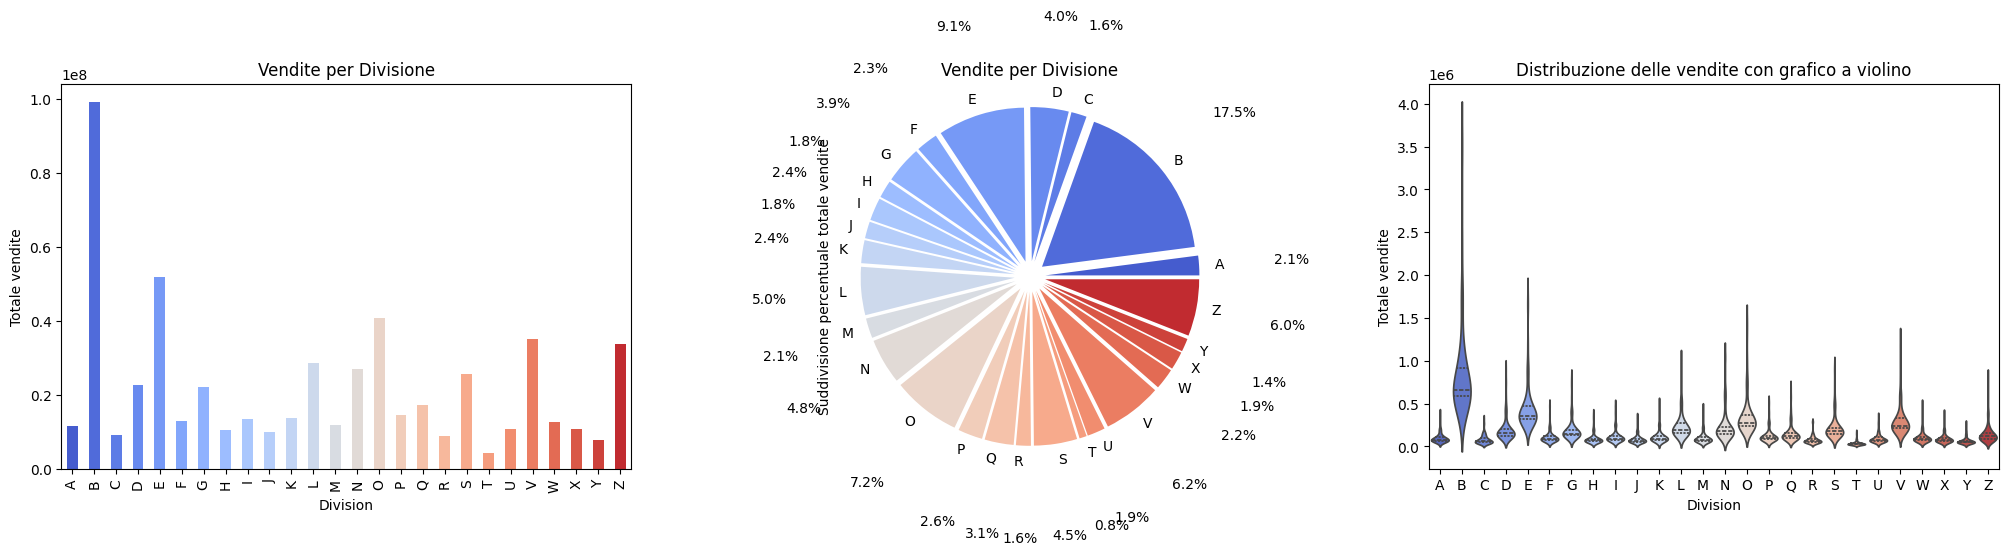

In [9]:
# Definizione di una palette comune
# Creiamo una palette di colori utilizzando la gradazione "coolwarm",
# con un numero di colori uguale al numero di divisioni uniche nel dataset.
palette = sns.color_palette("coolwarm", len(df['Division'].unique()))

# Creazione della figura e dei sottotrame
# Creiamo una figura con 1 riga e 3 colonne per i grafici, e impostiamo le dimensioni complessive.
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

# Grafico a barre
# Raggruppiamo i dati per 'Division' e calcoliamo la somma delle vendite per ogni divisione.
# Creiamo un grafico a barre, impostando il colore con la palette definita.
df.groupby('Division')['Sales'].sum().plot(kind='bar', ax=axes[0], color=palette)
axes[0].set_title('Vendite per Divisione')  # Aggiungiamo il titolo al grafico a barre
axes[0].set_ylabel("Totale vendite")  # Aggiungiamo un'etichetta all'asse Y

# Grafico a torta
# Raggruppiamo i dati per 'Division' e calcoliamo la somma delle vendite per ciascuna divisione.
# Creiamo un grafico a torta, impostando le etichette, le percentuali, e i colori.
df_grouped = df.groupby('Division')['Sales'].sum()
axes[1].pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%', pctdistance=1.6, 
            colors=palette, explode= [0.1] * len(df_grouped))
axes[1].set_title("Vendite per Divisione")  # Aggiungiamo il titolo al grafico a torta
axes[1].set_ylabel("Suddivisione percentuale totale vendite")  # Aggiungiamo un'etichetta descrittiva

# Grafico a violino
# Creiamo un grafico a violino per visualizzare la distribuzione delle vendite per ciascuna divisione.
# Mostriamo i quartili all'interno di ogni violino, e usiamo la stessa palette di colori.
sns.violinplot(x='Division', y='Sales', data=df, inner='quartile', palette=palette, ax=axes[2])
axes[2].set_title('Distribuzione delle vendite con grafico a violino')  # Aggiungiamo il titolo al grafico a violino
axes[2].set_ylabel("Totale vendite")  # Aggiungiamo un'etichetta all'asse Y

# Visualizzazione finale
# Mostriamo i grafici all'utente
plt.show()


# Spiegazione grafico precedente

## Come sono suddivise nel nostre vendite? Quanto si differenziano fra loro? In che percentuale? E come sono distribuite?

### **Grafico a barre (Barplot)**:
- Il grafico a barre mostra il totale delle vendite per ciascuna divisione. Ogni barra rappresenta una divisione, e l'altezza della barra è proporzionale al totale delle vendite. 
Il colore di ogni barra è determinato dalla palette "coolwarm", che cambia in base alla divisione.

### **Grafico a torta (Pie)**:
- Il grafico a torta rappresenta la percentuale di vendite per ciascuna divisione. Ogni fetta della torta indica il contributo percentuale di una divisione al totale complessivo delle vendite. 
Le etichette mostrano le percentuali, e ogni divisione è colorata utilizzando la stessa palette del grafico a barre. Le fette sono anche "esplose" leggermente per evidenziare ogni segmento.

### **Grafico a violino (Violinplot)**:
- Il grafico a violino mostra la distribuzione delle vendite all'interno di ciascuna divisione, rappresentando la densità dei dati. 
Le forme a violino indicano come sono distribuite le vendite per ogni divisione, con quartili e mediane visualizzati all'interno del grafico. 
Il colore del violino è legato alla palette e aiuta a distinguere le divisioni.
Questi tre grafici forniscono una visione completa delle vendite per divisione: il totale, la distribuzione percentuale e la variabilità.

&nbsp;

In [10]:
# Calcolare il totale delle vendite per Divisione e Mese
# 'Total_Sales_Month' è una nuova colonna che somma le vendite per ogni combinazione di Divisione e Mese
df['Total_Sales_Month'] = df.groupby(['Division', 'Month'])['Sales'].transform('sum')

# Definizione delle colonne relative alle impressioni
# Le colonne indicano diversi tipi di impressioni (visualizzazioni a pagamento, organiche, ecc.)
impression_columns = df.columns[2:9]

# Riorganizzazione dei dati in formato long per includere i tipi di impressioni
# 'df.melt()' trasforma il DataFrame da formato largo a formato lungo,
# in cui le colonne degli impressioni diventano una sola colonna con il tipo di impressione.
df_impressions = df.melt(id_vars=["Division", "Month", "Total_Sales_Month"], 
                         value_vars=impression_columns, 
                         var_name="Impressions_Type", 
                         value_name="Impressions")

# Calcolare la somma totale delle impression per ogni Divisione e Mese
# Aggiungiamo una nuova colonna 'Total_Impressions_Month' che somma tutte le impressioni per ogni combinazione di Divisione e Mese
df_impressions['Total_Impressions_Month'] = df_impressions.groupby(['Division', 'Month'])['Impressions'].transform('sum')

# Calcolare la proporzione delle vendite per tipo di impressione
# Per ogni tipo di impressione, calcoliamo quanto ciascuna influisce sulle vendite totali di quel mese e divisione
df_impressions['Sales_Per_Impression'] = (df_impressions['Impressions'] / df_impressions['Total_Impressions_Month']) * df_impressions['Total_Sales_Month']

# Creazione del grafico Sunburst per le vendite (figura 1)
# Il grafico Sunburst mostra la distribuzione delle vendite per Divisione, Mese e Tipo di Impressione
fig1 = px.sunburst(df_impressions, 
                  path=["Division", "Month", "Impressions_Type"], 
                  values="Sales_Per_Impression",  # Utilizziamo la colonna 'Sales_Per_Impression' per determinare le dimensioni del grafico
                  color="Sales_Per_Impression",  # I colori sono determinati dalle vendite per impressione
                  color_continuous_scale="Viridis")  # La mappa dei colori è "Viridis", che è una gradazione di colori

# Personalizzare il tracciato Sunburst
# Modifica del testo nel grafico e dei dettagli dell'hover per visualizzare solo le vendite
fig1.update_traces(textinfo="label+percent entry+value", 
                  hovertemplate="Vendite: %{value}")  # Durante il passaggio del mouse, mostriamo il valore delle vendite

# Impostazione del titolo del grafico
fig1.update_layout(title_text="Vendite per Divisione, Mese e Tipo di Impressione")

# Riorganizzazione dei dati in formato long per le impressioni (figura 2)
# Utilizziamo lo stesso approccio di prima, ma questa volta solo per le impressioni
df_long = df.melt(id_vars=["Division", "Month"], 
                  value_vars=impression_columns, 
                  var_name="Impressions_Type", 
                  value_name="Impressions")

# Creazione del grafico Sunburst per le impressioni (figura 2)
# Il grafico Sunburst mostra la distribuzione delle impressioni per Divisione e Mese
fig2 = px.sunburst(df_long, path=["Division", "Month", "Impressions_Type"], values="Impressions")

# Personalizzare il tracciato Sunburst per le impressioni
# Modifica del testo nel grafico e dei dettagli dell'hover per visualizzare solo il numero delle impressioni
fig2.update_traces(textinfo="label+percent entry+value", 
                   hovertemplate="<b>Impressioni: %{value}")  # Durante il passaggio del mouse, mostriamo il numero delle impressioni

# Impostazione del titolo del grafico
fig2.update_layout(title_text="Impressioni per Divisione e Mese")

# Creare un layout con due colonne per visualizzare entrambi i grafici
# 'make_subplots()' ci permette di combinare più grafici in una singola figura con layout a più sottotrame
fig = make_subplots(
    rows=1, cols=2,  # Una sola riga con due colonne
    subplot_titles=["Vendite per Divisione e Mese", "Impressioni per Divisione e Mese"],  # Titoli per ogni sottotrama
    column_widths=[0.5, 0.5],  # Assegnare una larghezza uguale a ciascuna colonna
    specs=[[{'type': 'sunburst'}, {'type': 'sunburst'}]]  # Specificare che entrambi i grafici sono di tipo 'sunburst'
)

# Aggiungere i tracciati dai due grafici (figura 1 e figura 2) alle rispettive sottotrame
# Aggiungiamo i tracciati del grafico delle vendite alla prima sottotrama
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
# Aggiungiamo i tracciati del grafico delle impressioni alla seconda sottotrama
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Aggiornare il layout della figura complessiva per un aspetto più pulito
fig.update_layout(
    height=800,  # Impostiamo l'altezza totale della figura
    title_text="Sunburst Diagram per Vendite e Impressioni",  # Titolo della figura
    showlegend=False  # Disabilitiamo la legenda (non necessaria per i grafici Sunburst)
)

# Mostrare il grafico combinato
fig.show()


# Spiegazione grafico precedente

### 1. **Grafico Sunburst delle Vendite per Divisione e Mese**:
   - Questo grafico **Sunburst** visualizza la distribuzione delle **vendite** per **Divisione**, **Mese** e **Tipo di Impressions**.
   - Ogni segmento rappresenta una combinazione di queste variabili e la dimensione del segmento è proporzionale alle **vendite per impressions**. I colori all'interno dei segmenti indicano l'entità delle vendite: colori più scuri o brillanti riflettono vendite più alte.
   - Il grafico consente di esplorare facilmente come le vendite si distribuiscono tra le diverse divisioni e mesi, nonché l'impatto dei vari tipi di visualizzazioni sulle vendite.

### 2. **Grafico Sunburst delle Visualizzazioni per Divisione e Mese**:
   - Questo grafico **Sunburst** visualizza la distribuzione delle **visualizzazioni** per **Divisione** e **Mese**, suddividendo le visualizzazioni per **Tipo di Impressions**.
   - Ogni segmento mostra la quantità di visualizzazioni per un determinato tipo (ad esempio, visualizzazioni a pagamento, organiche, ecc.), ed è proporzionale alla quantità totale di visualizzazioni per quel mese e divisione.
   - Questo grafico aiuta a comprendere la distribuzione delle visualizzazioni e a confrontare i diversi tipi di visualizzazioni per ogni divisione e mese.

### **Barra di Correlazione**:
   - Tra i due grafici, è presente una **barra di correlazione** che rappresenta la relazione tra i due set di dati (vendite e visualizzazioni). Sebbene non indichi una correlazione diretta tra le variabili, la barra aiuta a capire visualmente l'intensità delle vendite e delle visualizzazioni attraverso un gradiente di colori.
   - I valori di correlazione vanno da "Bassa" a "Alta", con i colori che variano dalla parte sinistra (bassa correlazione) alla parte destra (alta correlazione).

### **Complessivamente**:
Questi grafici insieme permettono di esplorare le vendite e le visualizzazioni in modo interattivo e visivo, analizzando come le diverse divisioni, mesi e tipi di visualizzazioni influiscono su ciascun aspetto. La barra di correlazione funge da riferimento visivo per il legame tra le vendite e le visualizzazioni.

&nbsp;

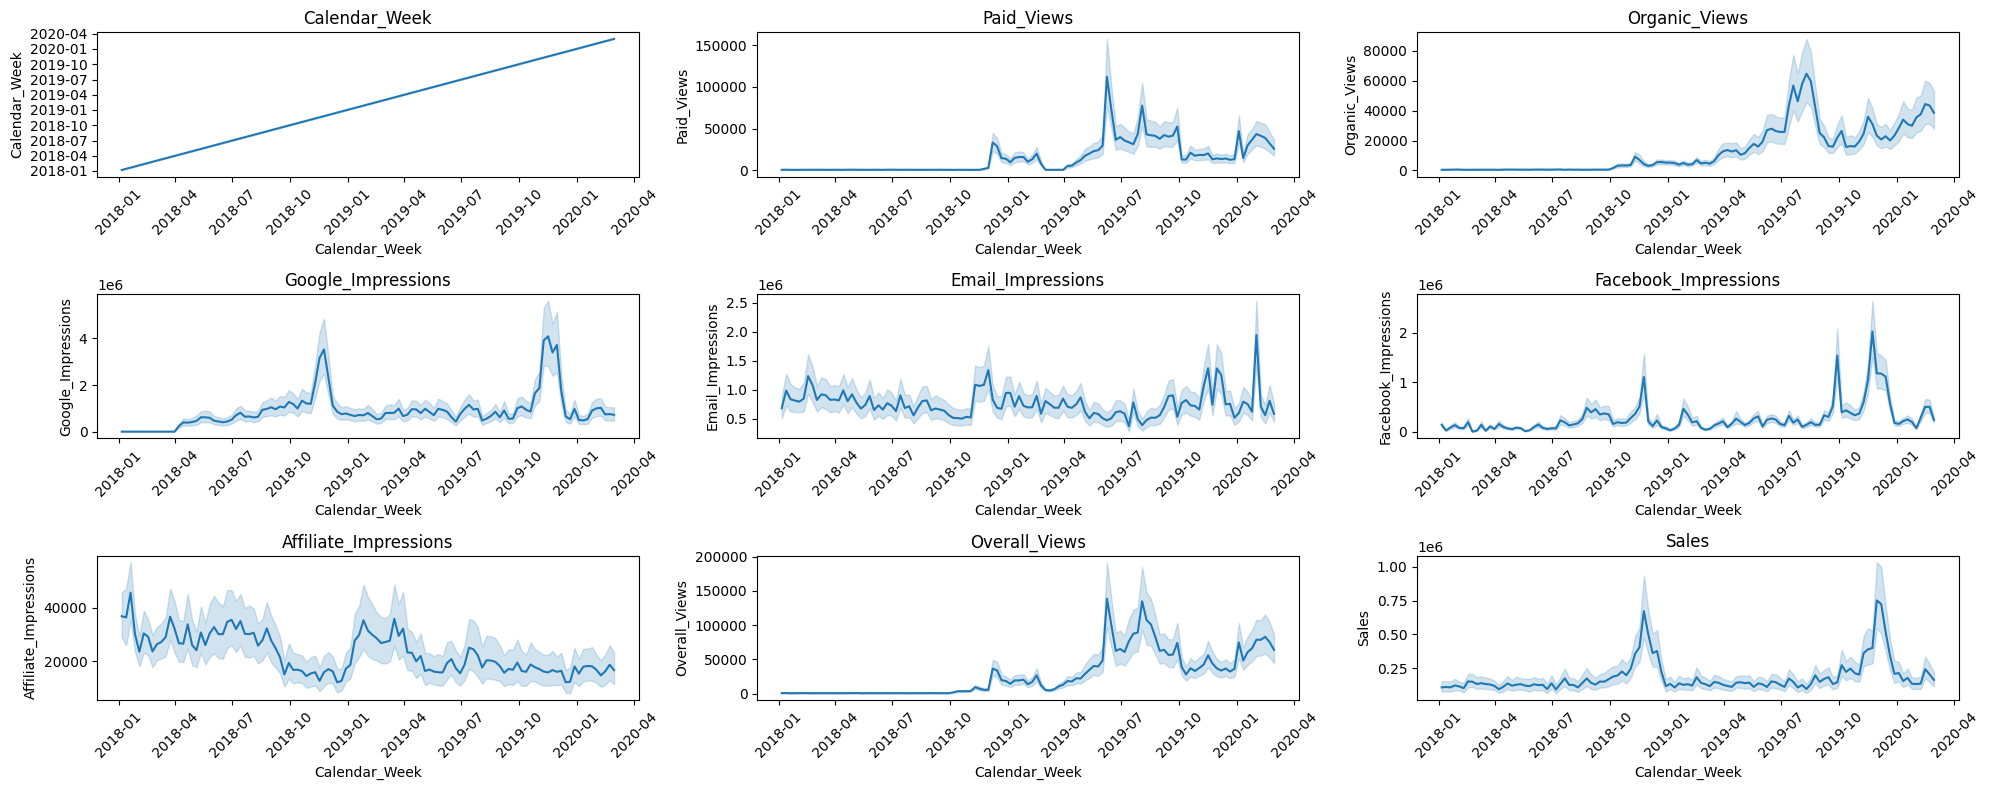

In [11]:
# Creazione della griglia di grafici
fig, axes = plt.subplots(3, 3, figsize=(20, 8))  # Creiamo una griglia di 3 righe e 3 colonne per i grafici, con una dimensione totale di 20x8 pollici

# Lista delle metriche da visualizzare
colonne = df.columns[1:]  # Selezioniamo tutte le colonne del dataframe tranne la prima (probabilmente 'Calendar_Week')

# Ciclo per iterare sugli assi e disegnare il lineplot
for idx, (row, col) in enumerate(np.ndindex(axes.shape)):  # Iteriamo attraverso tutte le posizioni della griglia (3x3)
    # Evitiamo di superare la lunghezza delle metriche disponibili
    if idx < len(colonne):  # Se l'indice è inferiore alla lunghezza delle colonne (metriche)
        sns.lineplot(data=df, x='Calendar_Week', y=colonne[idx], ax=axes[row, col])  # Creiamo un grafico a linea per ogni metrica
        axes[row, col].set_title(f'{colonne[idx]}')  # Aggiungiamo il titolo del grafico usando il nome della metrica
        axes[row, col].tick_params(axis='x', rotation=45)  # Ruotiamo le etichette dell'asse x per renderle leggibili
    else:
        # Se ci sono spazi vuoti nella griglia (esempio: se ci sono meno di 9 metriche), nascondiamo l'asse
        axes[row, col].axis('off')  # Nascondiamo l'asse vuoto

# Ottimizzare la visualizzazione
plt.tight_layout()  # Ottimizza lo spazio tra i grafici per evitare sovrapposizioni
plt.show()  # Mostra i grafici generati

# Spiegazione del grafico precedente e successivo (con max, min, mean e median)

## Come sono distribuite le visualizzazioni e le vendite? Hanno dei trend? Sono simili? Quali si rispecchiano di più? Dove e quando?

### **Grafico a Linea n°1**:
   - **Tipo di grafico**: Linea.
   - **Descrizione**: Questo grafico mostra l'andamento settimanale delle **vendite** (o altra metrica). L'asse **X** rappresenta le **settimane del calendario** (Calendar_Week), mentre l'asse **Y** mostra il valore delle **vendite** per quella settimana.
   - **Interpretazione**: Sta semplicemente tracciando una progressione dove la variabile Y cresce in modo proporzionale alla variabile X, rappresentando una crescita lineare. Utile per dare un orientamento nel grafico.

### **Grafici a Linea da n°2 a n°8**:
   - **Tipo di grafico**: Linea.
   - **Descrizione**: Ognuno di questi grafici mostra l'andamento settimanale di ciascun **tipo di visualizzazioni**. L'asse **X** è rappresentato dalle **settimane del calendario**, mentre l'asse **Y** mostra il numero di **visualizzazioni ricevute** per ogni settimana.
   - **Interpretazione**: Visualizza come le visualizzazioni sono cambiate nel tempo. Può aiutare a comprendere l'efficacia e la correlazione tra i tipi visualizzazioni e vendite se confrontati con il grafico n°9.

### **Grafico a Linea n°9**:
   - **Tipo di grafico**: Linea.
   - **Descrizione**: Questo grafico mostra l'andamento settimanale delle **vendite** (o altra metrica). L'asse **X** rappresenta le **settimane del calendario** (Calendar_Week), mentre l'asse **Y** mostra il valore delle **vendite** per quella settimana.
   - **Interpretazione**: Aiuta a visualizzare come le vendite sono cambiate nel tempo, evidenziando tendenze, picchi o cali nelle vendite settimanali.

### **Note Generali**:
- **Titoli dei Grafici**: Ogni grafico è etichettato con il nome della metrica (ad esempio, "Sales", "Paid_Views", "Organic_Views", ecc.), per identificare facilmente la metrica mostrata.
- **Asse X (settimane)**: Tutti i grafici usano lo stesso asse **X**, che rappresenta le **settimane del calendario** (Calendar_Week), facilitando il confronto tra le metriche per lo stesso intervallo di tempo.
- **Ruotamento delle Etichette X**: Le etichette sull'asse X sono ruotate di **45 gradi** per migliorare la leggibilità delle settimane.

### **Osservazioni**:
Come possiamo vedere, il periodo invernale è quello più profiquo, sarà per il maggior tempo speso sui social, sarà per il periodo di regali, potrebbe essere per molti fattori, ma a noi non interessa, analizzeremo i dati nel modo più imparziale possibile.  
Dando uno sguardo al grafico, i grafici all'interno rispecchiano perfettamente le correlazioni visualizzate nel grafico di correlazione (Heatmap) creato precedentemente.
L'andamento delle visualizzazioni lungo le settimane nei grafici n°6, n°7 e n°8, rispettivamente di Google, Email e Facebook, rispecchia quasi totalmente il grafico n°9 delle vendite, mentre gli altri grafici lo rispecchiano solo parzialmente, questo insieme di grafici avvalora la nostra tesi, ovvero che alcune visualizzazioni sono state cruciali per il totale delle vendite, mentre alcune solo parzialmente.

### **Conclusioni**:
Questi grafici a linee forniscono una panoramica dell'andamento delle principali metriche di performance nel tempo. Possono essere utilizzati per analizzare tendenze, stagionalità e impatti di varie attività di marketing, come campagne pubblicitarie, traffico organico e impressioni.

&nbsp;

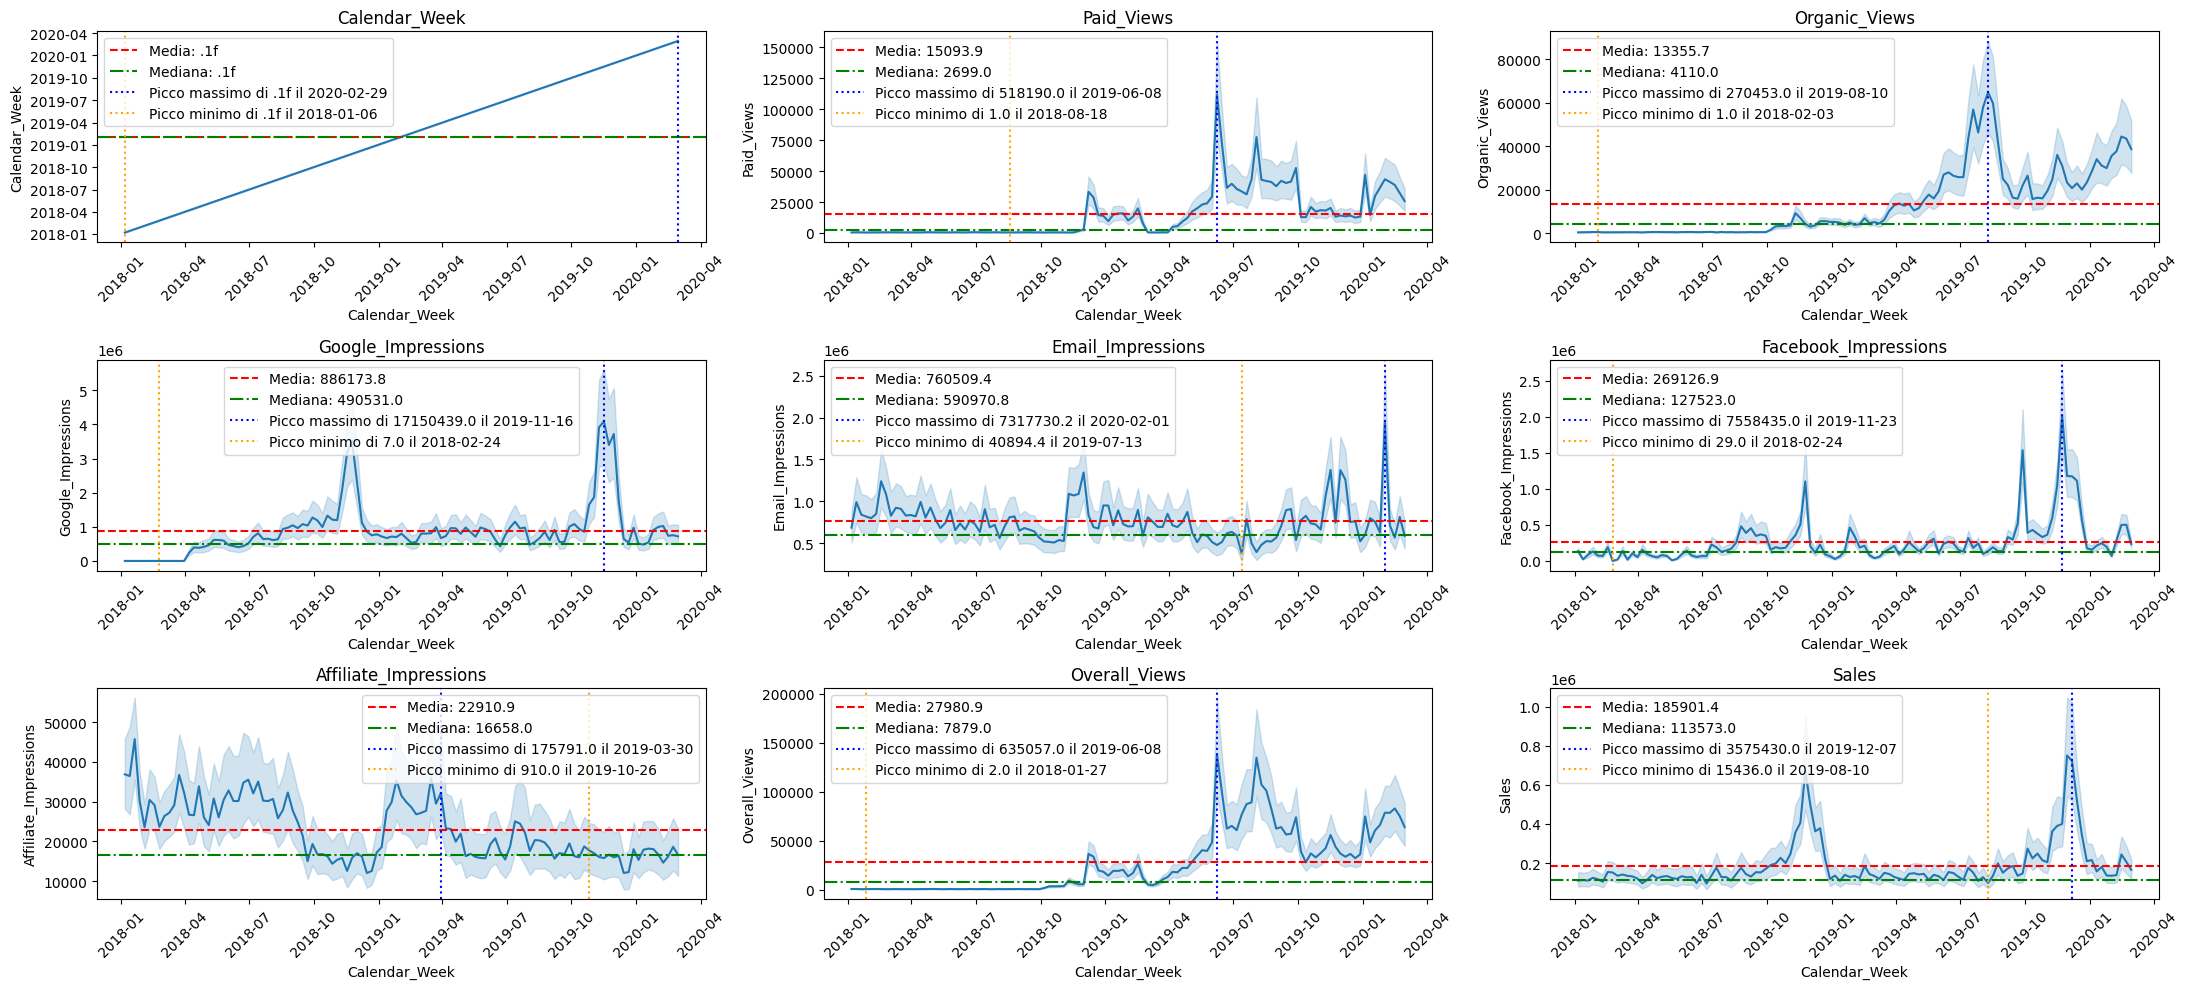

In [12]:
# Creazione dinamica della griglia di grafici
fig, axes = plt.subplots(3, 3, figsize=(22, 10))  # Crea una griglia 3x3 di grafici (3 righe e 3 colonne)
# figsize=(22, 10) specifica le dimensioni del grafico (22 pollici di larghezza e 10 di altezza)

# Lista delle metriche da visualizzare
colonne = df.columns[1:10]  # Selezioniamo le colonne da visualizzare, escludendo la prima (presumibilmente 'Calendar_Week')

# Ciclo per iterare sugli assi e disegnare il lineplot
for idx, (row, col) in enumerate(np.ndindex(axes.shape)):
    # np.ndindex(axes.shape) genera gli indici di tutte le posizioni nella griglia 3x3
    # idx rappresenta l'indice corrente, row e col sono le coordinate della cella corrente nella griglia

    # Evitiamo di superare la lunghezza delle metriche disponibili
    if idx < len(colonne):
        try:
            # Calcolare il minimo e massimo per il singolo grafico
            y_min = df[colonne[idx]].min()  # Troviamo il valore minimo della metrica corrente
            y_max = df[colonne[idx]].max()  # Troviamo il valore massimo della metrica corrente

            # Troviamo la settimana ('Calendar_Week') corrispondente al picco massimo e minimo
            p_x_max = df.loc[df[colonne[idx]].idxmax(), 'Calendar_Week']  # Settimana in cui si trova il picco massimo
            p_x_min = df.loc[df[colonne[idx]].idxmin(), 'Calendar_Week']  # Settimana in cui si trova il picco minimo
            
            # Disegnare il grafico con la sua scala
            sns.lineplot(data=df, x='Calendar_Week', y=colonne[idx], ax=axes[row, col])  # Grafico a linee
            axes[row, col].set_title(f'{colonne[idx]}')  # Impostiamo il titolo del grafico
            axes[row, col].tick_params(axis='x', rotation=45)  # Ruotiamo le etichette dell'asse x di 45 gradi per leggibilità

            # Aggiungere la media della y
            mean_yvalue = df[colonne[idx]].mean()  # Calcoliamo la media della metrica corrente
            axes[row, col].axhline(mean_yvalue, color='red', linestyle='--', label=f'Media: {mean_yvalue:.1f}')  
            # Disegniamo una linea orizzontale rossa tratteggiata per rappresentare la media, con una label

            # Aggiungere la mediana della y
            median_yvalue = df[colonne[idx]].median()  # Calcoliamo la mediana della metrica corrente
            axes[row, col].axhline(median_yvalue, color='green', linestyle='-.', label=f'Mediana: {median_yvalue:.1f}')
            # Disegniamo una linea orizzontale verde tratteggiata per rappresentare la mediana, con una label

            # Disegnare la linea del massimo picco (commentata)
            # axes[row, col].axhline(y=y_max, color='blue', linestyle=':', label=f'Max: {y_max:.2f}')
            # Questo codice è commentato, ma avrebbe disegnato una linea orizzontale blu per il picco massimo

            # Disegnare la linea del minimo picco (commentata)
            # axes[row, col].axhline(y=y_min, color='orange', linestyle=':', label=f'Min: {y_min:.2f}')
            # Questo codice è commentato, ma avrebbe disegnato una linea orizzontale arancione per il picco minimo

            # Aggiungere una linea verticale per il picco massimo
            axes[row, col].axvline(x=p_x_max, color='blue', linestyle=':', label=f'Picco massimo di {y_max:.1f} il {str(p_x_max)[:10]}')
            # La linea verticale blu segnala il picco massimo con la data associata

            # Aggiungere una linea verticale per il picco minimo
            axes[row, col].axvline(x=p_x_min, color='orange', linestyle=':', label=f'Picco minimo di {y_min:.1f} il {str(p_x_min)[:10]}')
            # La linea verticale arancione segnala il picco minimo con la data associata

            # Aggiungere una legenda al grafico per visualizzare le informazioni aggiuntive
            axes[row, col].legend(fontsize=10)  # Impostiamo la dimensione del carattere della legenda

        except Exception as e:
            # Se c'è un errore durante il calcolo o la visualizzazione di un grafico, disabilitiamo l'asse e stampiamo l'errore
            axes[row, col].axis('off')  # Nascondiamo l'asse in caso di errore
            print(f"Errore con la metrica '{colonne[idx]}': {e}")  # Stampiamo l'errore nel terminale

    else:
        # Se ci sono spazi vuoti nella griglia (per esempio, più assi che metriche), nascondiamo gli assi vuoti
        axes[row, col].axis('off')  # Nascondiamo l'asse vuoto

# Ottimizzare la visualizzazione e la disposizione degli assi
plt.tight_layout()  # Ottimizza la disposizione degli assi per evitare sovrapposizioni
plt.show()  # Mostra il grafico

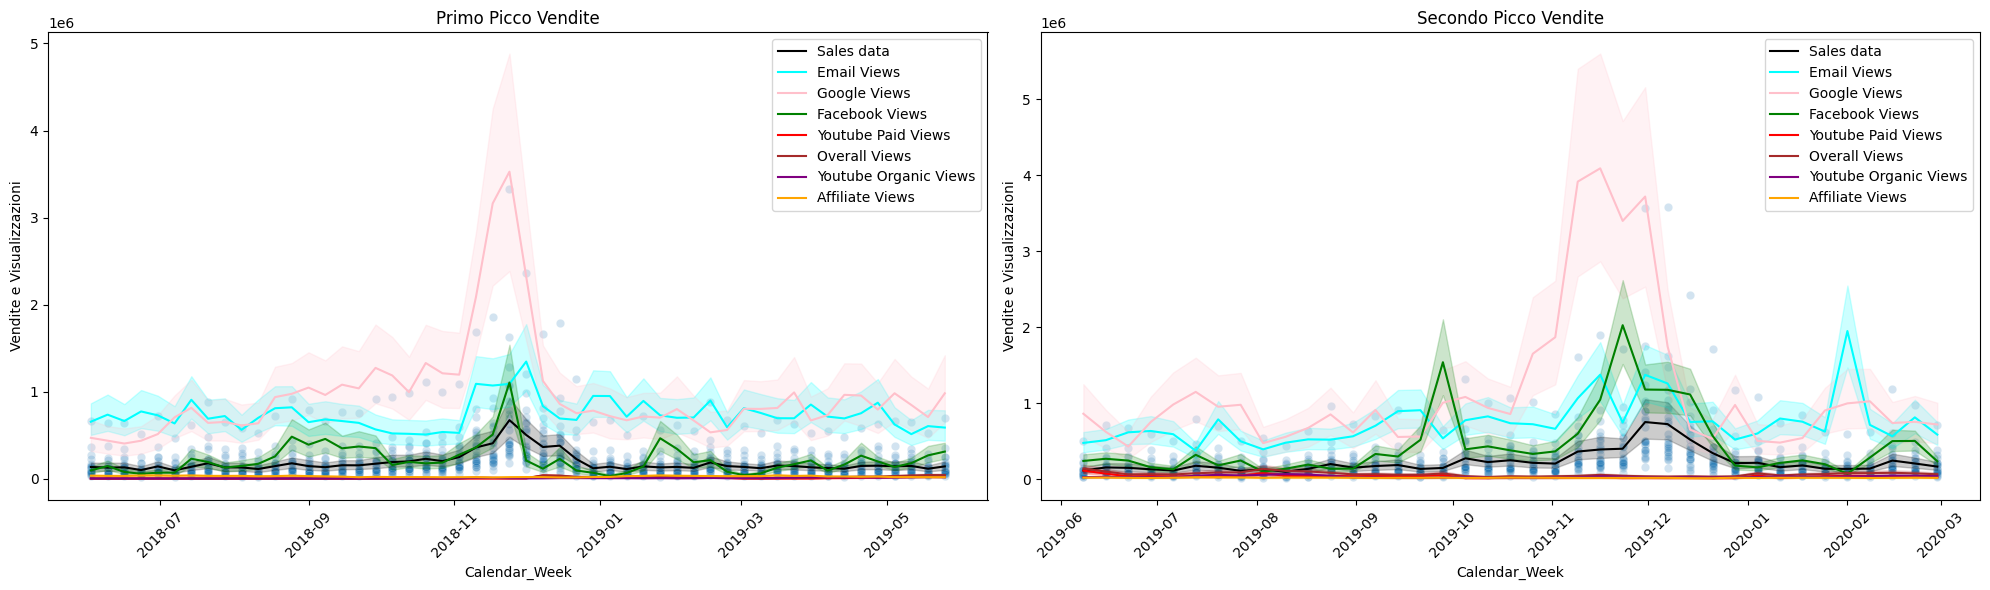

In [13]:
# Creazione della figura con 2 sottoplot
# 'figsize' definisce la dimensione della figura (larghezza, altezza)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Creazione dei sottoinsiemi dei dati
# Filtriamo il DataFrame per estrarre i dati del primo picco vendite
df_primo_picco_vendite = df.loc[(df['Calendar_Week'] > '2018-06-01') & (df['Calendar_Week'] < '2019-06-01')]
# Filtriamo il DataFrame per estrarre i dati del secondo picco vendite
df_secondo_picco_vendite = df.loc[(df['Calendar_Week'] > '2019-06-01') & (df['Calendar_Week'] < '2020-06-01')]

# Lista delle colonne da tracciare con i rispettivi colori e etichette
# Ogni tupla contiene il nome della colonna da tracciare, il colore della linea, e l'etichetta della legenda
plot_info = [
    ('Sales', 'black', 'Sales data'),
    ('Email_Impressions', 'cyan', 'Email Views'),
    ('Google_Impressions', 'pink', 'Google Views'),
    ('Facebook_Impressions', 'green', 'Facebook Views'),
    ('Paid_Views', 'red', 'Youtube Paid Views'),
    ('Overall_Views', 'brown', 'Overall Views'),
    ('Organic_Views', 'purple', 'Youtube Organic Views'),
    ('Affiliate_Impressions', 'orange', 'Affiliate Views')
]

# Grafico sul primo sottoplot
# Creiamo un grafico a dispersione per i dati delle vendite (Y) rispetto alla settimana (X)
sns.scatterplot(data=df_primo_picco_vendite, y='Sales', x='Calendar_Week', ax=axes[0], alpha=0.2)
# Aggiungiamo le linee per ogni variabile di interesse (Email Views, Google Views, etc.) usando un ciclo
for y_col, color, label in plot_info:
    sns.lineplot(data=df_primo_picco_vendite, x='Calendar_Week', y=y_col, ax=axes[0], color=color, label=label)

# Rotazione delle etichette sull'asse X (settimane) per migliorarne la leggibilità
axes[0].tick_params(axis='x', rotation=45)
# Titolo del primo sottoplot
axes[0].set_title('Primo Picco Vendite')
# Etichetta dell'asse Y
axes[0].set_ylabel('Vendite e Visualizzazioni')
# Aggiunta della legenda per identificare le linee tracciate
axes[0].legend()

# Grafico sul secondo sottoplot
# Creiamo un grafico a dispersione per i dati delle vendite (Y) rispetto alla settimana (X)
sns.scatterplot(data=df_secondo_picco_vendite, y='Sales', x='Calendar_Week', ax=axes[1], alpha=0.2)
# Aggiungiamo le linee per ogni variabile di interesse (Email Views, Google Views, etc.) usando un ciclo
for y_col, color, label in plot_info:
    sns.lineplot(data=df_secondo_picco_vendite, x='Calendar_Week', y=y_col, ax=axes[1], color=color, label=label)

# Rotazione delle etichette sull'asse X (settimane) per migliorarne la leggibilità
axes[1].tick_params(axis='x', rotation=45)
# Titolo del secondo sottoplot
axes[1].set_title('Secondo Picco Vendite')
# Etichetta dell'asse Y
axes[1].set_ylabel('Vendite e Visualizzazioni')
# Aggiunta della legenda per identificare le linee tracciate
axes[1].legend()

# Ottimizzazione del layout per evitare sovrapposizioni tra i grafici
plt.tight_layout()
# Visualizzazione del grafico
plt.show()

# Spiegazione grafico precedente

## Come si presentano i due picchi principali con le varie visualizzazioni sovrapposte? Ci sono sostanziali differenza in termini di quantità? Quanto sono stabili col passare del tempo?

Il codice genera un grafico con due sottografici (subplots), ciascuno rappresentante un periodo distinto di vendite. La figura mostra l'andamento delle **vendite** e delle **visualizzazioni** (da diverse fonti, come Email, Google, Facebook, ecc.) durante due picchi di vendite, uno dal **2018 al 2019** e l'altro dal **2019 al 2020**.

1. **Primo sottografico** (a sinistra): mostra i dati delle vendite e delle visualizzazioni per il primo picco.
2. **Secondo sottografico** (a destra): rappresenta lo stesso tipo di dati per il secondo picco.

Ogni grafico include:
- Un grafico a dispersione (Scatterplot) e uno a linea (Lineplot) per visualizzare le vendite nel tempo (sull'asse delle Y) rispetto alle settimane (sull'asse delle X).
- Linee colorate che rappresentano altre variabili, come le visualizzazioni da Email, Google, Facebook, ecc.
- Le etichette delle settimane sono ruotate per migliorarne la leggibilità.

Infine, vengono aggiunti titoli, etichette e legende per facilitare l'interpretazione dei dati. Il layout della figura è ottimizzato per evitare sovrapposizioni tra i grafici.

### **Osservazioni**:
Come possiamo notare, nella sovrapposizione di dati spiccano le visualizzazioni provenienti da Google, Email e Facebook, non solo per i grandi picchi raggiunti, ma anche per la loro costante mole lungo il passare dei mesi.


&nbsp;

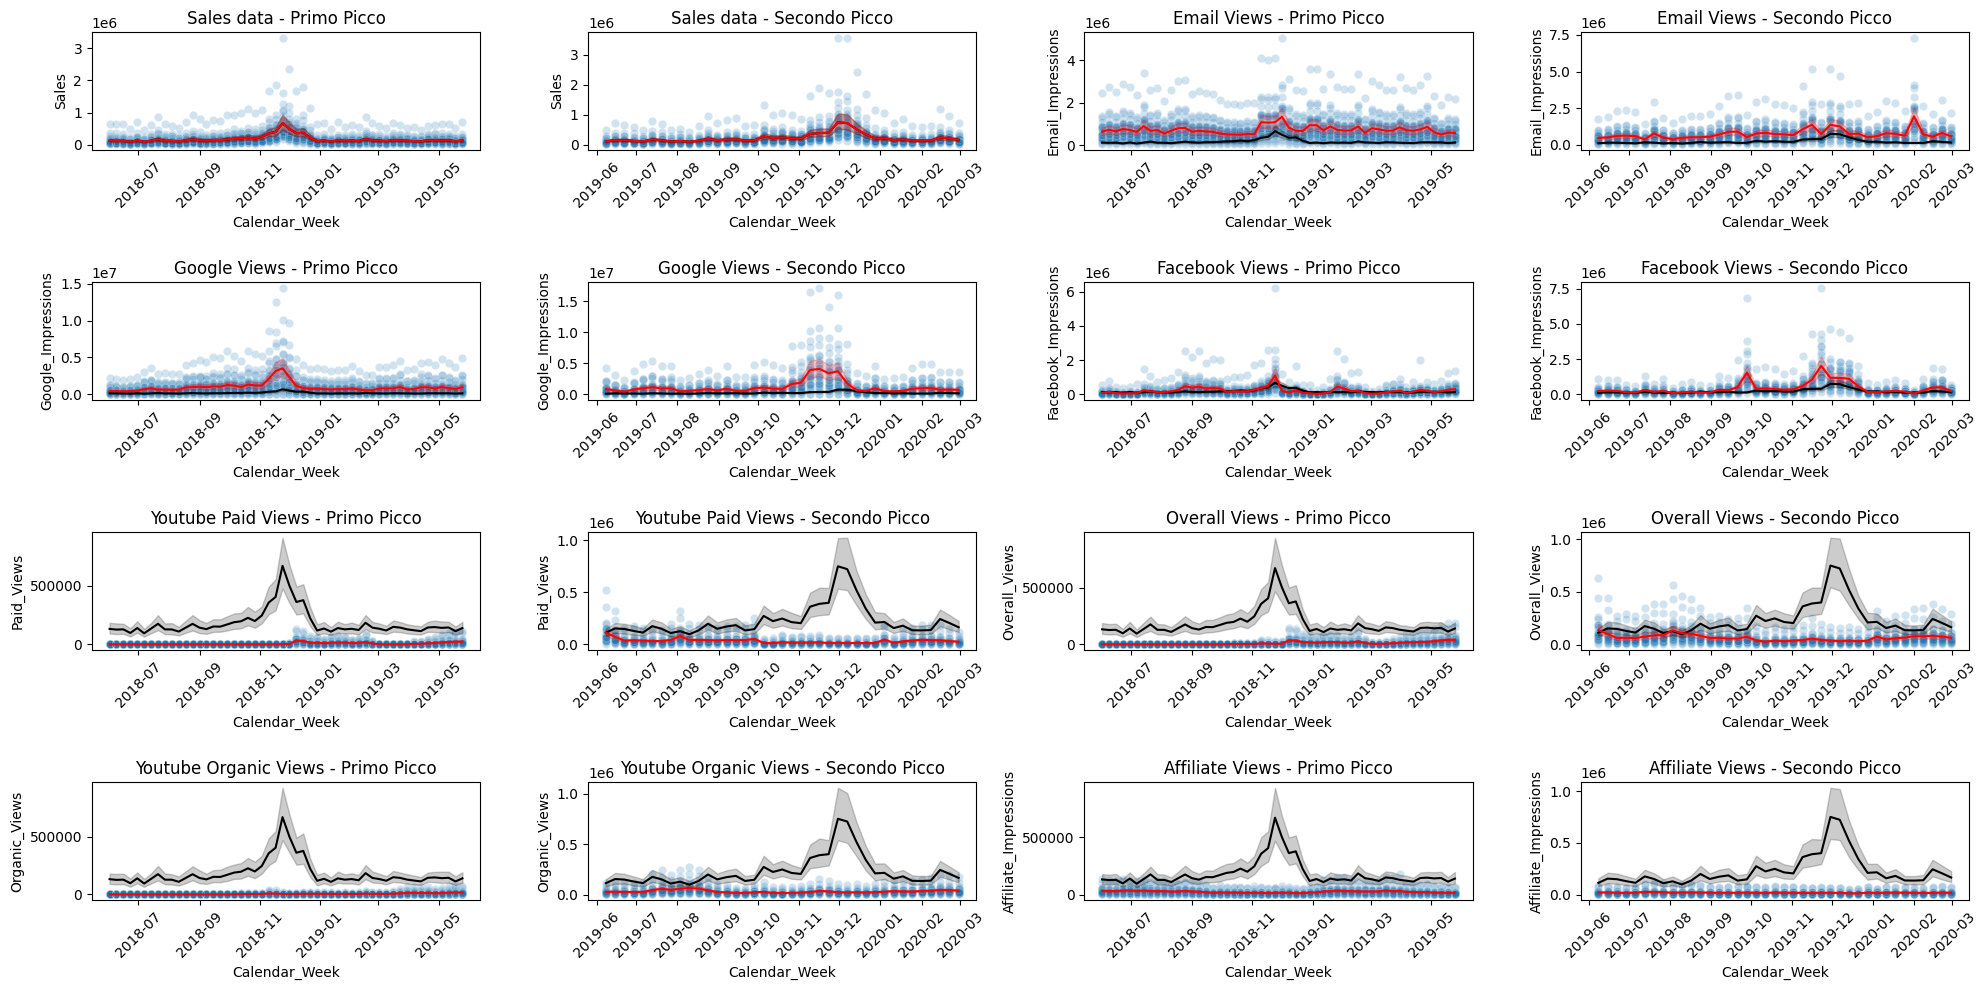

In [14]:
# Separazione dei dati nei due periodi di vendite
# Primo periodo: da giugno 2018 a giugno 2019
df_primo_picco_vendite = df.loc[(df['Calendar_Week'] > '2018-06-01') & (df['Calendar_Week'] < '2019-06-01')]

# Secondo periodo: da giugno 2019 a giugno 2020
df_secondo_picco_vendite = df.loc[(df['Calendar_Week'] > '2019-06-01') & (df['Calendar_Week'] < '2020-06-01')]

# Lista delle variabili da tracciare, con il relativo colore e titolo
plot_info = [
    ('Sales', 'red', 'Sales data'),
    ('Email_Impressions', 'red', 'Email Views'),
    ('Google_Impressions', 'red', 'Google Views'),
    ('Facebook_Impressions', 'red', 'Facebook Views'),
    ('Paid_Views', 'red', 'Youtube Paid Views'),
    ('Overall_Views', 'red', 'Overall Views'),
    ('Organic_Views', 'red', 'Youtube Organic Views'),
    ('Affiliate_Impressions', 'red', 'Affiliate Views')
]

# Creazione di una griglia di sottografici (4 righe, 4 colonne)
fig, axes = plt.subplots(4, 4, figsize=(20, 10))

# Ciclo per tracciare i grafici per ciascuna variabile della lista plot_info
for idx, (y_col, color, title) in enumerate(plot_info):
    # Calcolo della posizione del grafico sulla griglia
    row = idx // 2  # Ogni due grafici cambiamo riga
    col_left = idx * 2 % 4  # Colonna sinistra del grafico
    col_right = col_left + 1  # Colonna destra del grafico

    # Primo grafico (primo picco vendite): scatterplot e lineplot
    sns.scatterplot(data=df_primo_picco_vendite, x='Calendar_Week', y=y_col, ax=axes[row, col_left], alpha=0.2)
    sns.lineplot(data=df_primo_picco_vendite, x='Calendar_Week', y='Sales', ax=axes[row, col_left], color='black')  # Linea per le vendite
    sns.lineplot(data=df_primo_picco_vendite, x='Calendar_Week', y=y_col, ax=axes[row, col_left], color=color)  # Linea per la variabile y_col
    axes[row, col_left].tick_params(axis='x', rotation=45)  # Rotazione delle etichette sull'asse X
    axes[row, col_left].set_title(f'{title} - Primo Picco')  # Impostazione del titolo del grafico

    # Secondo grafico (secondo picco vendite): scatterplot e lineplot
    sns.scatterplot(data=df_secondo_picco_vendite, x='Calendar_Week', y=y_col, ax=axes[row, col_right], alpha=0.2)
    sns.lineplot(data=df_secondo_picco_vendite, x='Calendar_Week', y='Sales', ax=axes[row, col_right], color='black')  # Linea per le vendite
    sns.lineplot(data=df_secondo_picco_vendite, x='Calendar_Week', y=y_col, ax=axes[row, col_right], color=color)  # Linea per la variabile y_col
    axes[row, col_right].tick_params(axis='x', rotation=45)  # Rotazione delle etichette sull'asse X
    axes[row, col_right].set_title(f'{title} - Secondo Picco')  # Impostazione del titolo del grafico

# Ottimizzazione della disposizione dei grafici
plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni
plt.show()  # Mostra il grafico finale

# Spiegazione grafico precedente

## Come appaiono le varie visualizzazione confrontate con l'andamento delle vendite? 

Il codice genera una **griglia 4x4 di grafici**, ciascuno contenente due sotto-grafici affiancati per ogni variabile, in modo da confrontare il comportamento di ciascuna variabile durante i due periodi di vendite distinti.

### Descrizione dei grafici risultanti:

1. **Primo Picco (Periodo da giugno 2018 a giugno 2019)**:
   - Per ogni variabile, il **grafico a sinistra** mostra il comportamento della variabile nel periodo del **primo picco delle vendite** (giugno 2018 - giugno 2019).
   - **Scatterplot**: I dati sono rappresentati come punti (con un'alta trasparenza, indicata da alpha=0.2), permettendo di osservare la distribuzione settimanale.
   - **Lineplot**: Una linea nera rappresenta l'andamento delle vendite (Sales), mentre una linea colorata (ad esempio, rossa) traccia il comportamento della variabile di interesse (come ad esempio Email_Impressions, Google_Impressions, ecc.).

2. **Secondo Picco (Periodo da giugno 2019 a giugno 2020)**:
   - Il **grafico a destra** mostra il comportamento della stessa variabile durante il **secondo picco delle vendite** (giugno 2019 - giugno 2020).
   - Come nel primo grafico, sono presenti sia **scatterplot** che **lineplot**: la linea nera rappresenta le vendite, mentre quella colorata traccia il comportamento della variabile specifica.

### Variabili visualizzate:
Ogni riga della griglia presenta due grafici per la stessa variabile, che potrebbero essere, ad esempio:
- **Sales data**: Confronto tra l'andamento delle vendite nel primo e nel secondo picco.
- **Email Views**: Confronto tra il numero di impressioni email nel primo e nel secondo picco.
- **Google Views**, **Facebook Views**, **Youtube Paid Views**, **Overall Views**, **Youtube Organic Views**, **Affiliate Views**: Confronto tra l'andamento delle visualizzazioni su diverse piattaforme nel primo e nel secondo picco.

### **Osservazioni**:
Come possiamo notare, le principali visualizzazioni che rispecchiano l'andamento del lineplot delle vendite sono Google, Email e Facebook, mentre le altre solo in dei punti o addiritture per niente. Questo insieme di grafici, è stato generato per vari motivi, il primo è quello di cantinuare ad avvalorare la tesi che Google, Email e Facebook sono state le principali visualizzazioni ad influenzare le vendite in generale, il secondo è quello di analizzare più approfonditamente le altre visualizzazioni in cerca di qualche tendenza, perchè pensare che le vendite siano state date solo da quest'ultime, è sbagliato, come abbiamo visto, le tre principali, sono state presenti per tutto l'arco delle settimane soprattutto in determinati momenti, ma non dobbiamo diementicare che le vendite sono complessive, quindi date dalla somma con le altre visualizzazioni, per questo la nostra analisi si sposterà sul dove ogni tipo di visualizzazione è stata utile, così da capire quando aspettarsi un iterazione da parte di quel tipo di visualizzazione e ottimizzare i futuri investimenti.

### Conclusioni che si possono trarre dai grafici:
- **Tendenze temporali**: I grafici mostrano come ciascuna variabile (ad esempio, impressioni o visualizzazioni) sia evoluta durante i due periodi di picco. 
- **Andamento delle vendite**: Confrontando la linea nera (che rappresenta le vendite) con le altre linee colorate, è possibile osservare se e come le variabili siano correlate all'andamento delle vendite nel tempo.
- **Differenze tra i periodi**: I grafici evidenziano le differenze tra i due periodi di vendite, aiutando a comprendere l'effetto di determinati eventi o strategie sulle metriche analizzate.

In sintesi, l'output consiste in una serie di grafici che consentono di confrontare l'andamento di varie metriche tra due periodi distinti di vendite, evidenziando tendenze, correlazioni e differenze temporali.

&nbsp;

In [15]:
# Selezioniamo le colonne numeriche di interesse (dalla colonna 2 alla 8)
colonne = df.columns[2:9]  # Selezionare le colonne numeriche di interesse

# Creiamo una lista per memorizzare i dati filtrati per ogni settimana e colonna
filtered_data = []

# Iteriamo sulle settimane uniche del dataframe
for week in df['Calendar_Week'].unique():
    # Filtriamo il dataframe per la settimana corrente
    weekly_df = df[df['Calendar_Week'] == week]
    
    # Iteriamo su ogni colonna numerica selezionata
    for col in colonne:
        # Calcoliamo il valore medio della colonna per la settimana e lo aggiungiamo alla lista
        filtered_data.append({
            "week": week,  # La settimana corrente
            "column": col,  # Il nome della colonna
            "value": weekly_df[col].mean(),  # Il valore medio della colonna
        })

# Creiamo un nuovo dataframe con i dati filtrati
filtered_df = pd.DataFrame(filtered_data)

# Calcoliamo l'andamento settimanale delle vendite (media settimanale)
weekly_sales = df.groupby('Calendar_Week')['Sales'].mean().reset_index()

# Creiamo il grafico principale utilizzando Plotly
fig = px.line(
    filtered_df,  # Dati filtrati per le colonne numeriche
    x="week",  # Asse X (settimana)
    y="value",  # Asse Y (valore medio della colonna)
    color="column",  # Colore della linea in base alla colonna
)

# Aggiungiamo una linea per le vendite settimanali al grafico
fig.add_scatter(
    x=weekly_sales["Calendar_Week"],  # Settimane per le vendite
    y=weekly_sales["Sales"],  # Valori delle vendite
    mode="lines+markers",  # Mostrare sia le linee che i marker
    name="Vendite",  # Nome della serie nel grafico
    line=dict(color="black", dash="dash"),  # Linea nera tratteggiata
    hoverinfo="x+y",  # Mostriamo informazioni sui valori durante il hover
    marker=dict(size=6)  # Dimensione dei marker
)

# Scuriamo la luminosità dei marker per le linee delle colonne numeriche
for trace in fig.data:
    if trace.mode == "lines":  # Verifica se la traccia è una linea
        darkened_marker_color = mcolors.to_rgba(trace.line.color, 0.6)  # Scurire il marker
        trace.update(marker=dict(size=6, color=darkened_marker_color))  # Aggiorna il marker

# Aggiorniamo il layout del grafico con titoli e etichette
fig.update_layout(
    title="Andamento delle Impressions e Vendite Settimanali",  # Titolo del grafico
    xaxis_title="Settimane del calendario",  # Etichetta per l'asse X
    yaxis_title="Andamento visualizzazioni + vendite",  # Etichetta per l'asse Y
)

# Visualizziamo il grafico
fig.show()

# Spiegazione grafico precedente

## Come appaiono tutti i tipi di Impressions sovrapposti e rapportate alle vendite?

L'output di questo codice è un grafico interattivo che mostra l'andamento settimanale di diverse colonne numeriche (selezionate nel dataframe **df**) e le vendite medie settimanali, visualizzate in un'unica figura.

**Descrizione dell'output:**

1. **Linee per le colonne numeriche**: Vengono tracciate linee che rappresentano l'andamento settimanale delle colonne numeriche selezionate (dalla colonna 2 alla 8 di **df**). Ogni linea ha un colore diverso in base al nome della colonna, permettendo di distinguere facilmente i diversi indicatori.

2. **Linea delle vendite**: Viene aggiunta una linea nera tratteggiata che rappresenta l'andamento delle vendite medie settimanali. I punti della linea sono marcati da piccoli cerchi (marker) per evidenziare ogni valore settimanale delle vendite.

3. **Marker**: I marker sui grafici delle colonne numeriche sono leggermente scuriti rispetto ai colori originali per renderli visivamente distinti, mantenendo comunque l'evidenza delle tendenze nelle variabili monitorate.

4. **Asse X e Y**: L'asse X mostra le settimane del calendario, mentre l'asse Y mostra i valori medi delle colonne numeriche e delle vendite settimanali.

5. **Interattività**: L'utente può interagire con il grafico, passando il mouse sopra i punti per visualizzare i valori precisi di ogni settimana e colonna.

### **Osservazioni**:

Come già detto sopra, non dobbiamo soffermarci solo sulle visualizzazioni che sembrano più importanti, e questo grafico ne è la prova, mettendo in proporzione i vari tipi di visualizzazioni e le vendite, possiamo notare come le vendite siano molto più piccole rispetto alle milioni di visualizzazioni ricevute, questo può indicare che non necessariamente, più visualizzazioni = più vendite, rimarcando il fatto che anche se non sembra, i tipi di impressions con visualizzazioni più basse, non sono state inutili, quindi procederemo con un analisi molto più approfondita su quest'ultime.

In sintesi, il grafico fornisce una visualizzazione chiara delle tendenze settimanali delle variabili selezionate e delle vendite, facilitando il confronto tra le diverse metriche nel tempo.

&nbsp;

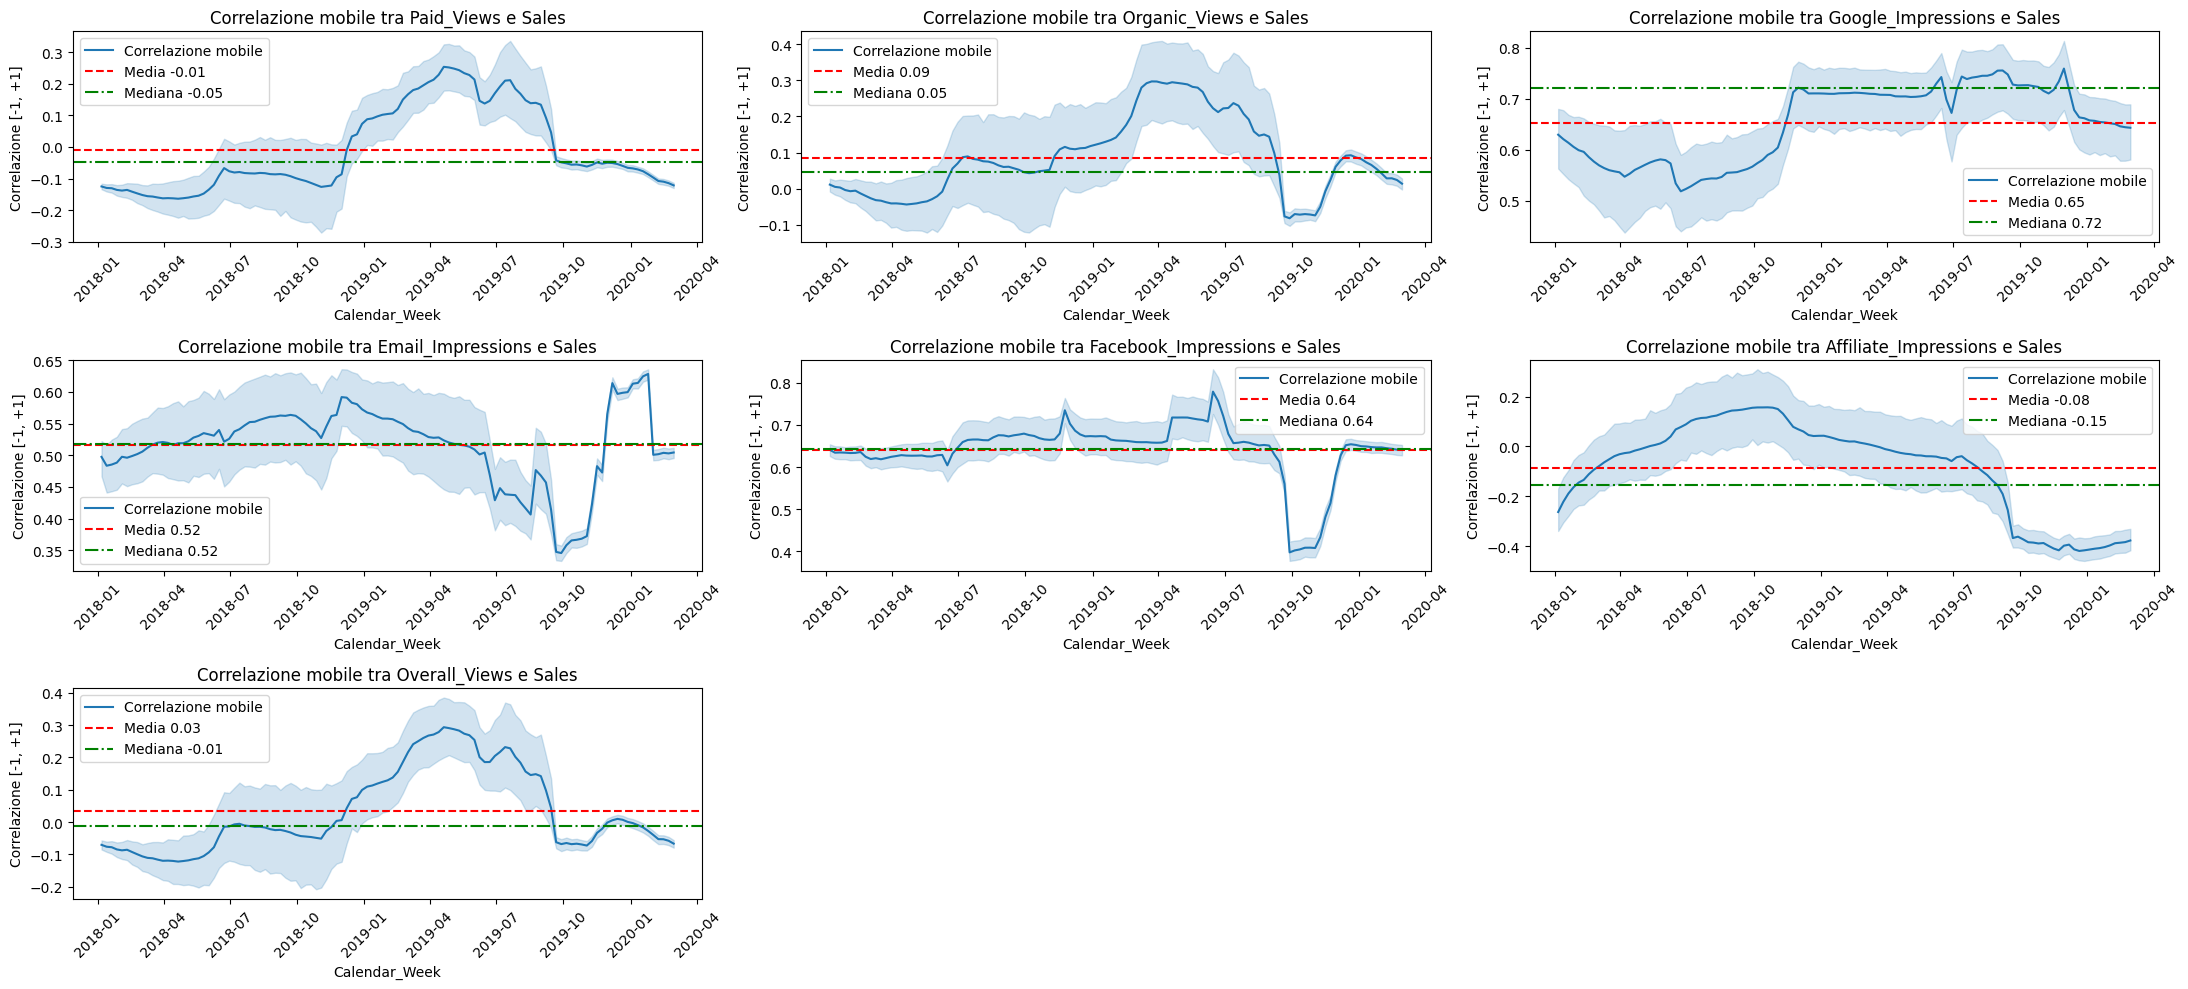

In [16]:
# Creazione dinamica della griglia di grafici 3x3
fig, axes = plt.subplots(3, 3, figsize=(22, 10))  # Creiamo una griglia 3x3 di grafici con una dimensione personalizzata

# Lista delle colonne numeriche da visualizzare
colonne = df.columns[2:9]  # Selezioniamo le colonne numeriche da analizzare (colonne dalla 2 alla 8)

# Ciclo per iterare su ogni posizione della griglia di grafici e disegnare il lineplot
for idx, (row, col) in enumerate(np.ndindex(axes.shape)):  # np.ndindex restituisce gli indici delle righe e colonne
    # Evitiamo di superare la lunghezza delle metriche disponibili
    if idx < len(colonne):
        try:
            # Calcoliamo la correlazione mobile tra la colonna corrente e le vendite (con finestra di 90)
            rolling_corr = df[colonne[idx]].rolling(window=90).corr(df['Sales'])  # Calcolo della correlazione mobile

            # Calcoliamo statistiche mobili (media, mediana) sulla finestra rolling
            rolling_mean = rolling_corr.mean()  # Media della correlazione mobile
            rolling_median = rolling_corr.median()  # Mediana della correlazione mobile
            # rolling_max = rolling_corr.max()  # Max della correlazione mobile (commentato per ora)
            # rolling_min = rolling_corr.min()  # Min della correlazione mobile (commentato per ora)

            # Disegnamo il grafico della correlazione mobile
            sns.lineplot(x=df['Calendar_Week'], y=rolling_corr, ax=axes[row, col], label='Correlazione mobile')

            # Aggiungiamo linee orizzontali per la media e la mediana
            axes[row, col].axhline(y=rolling_mean, color='red', linestyle='--', label=f'Media {rolling_mean:.2f}')  # Media in rosso
            axes[row, col].axhline(y=rolling_median, color='green', linestyle='-.', label=f'Mediana {rolling_median:.2f}')  # Mediana in verde

            # Aggiungere linee orizzontali per il massimo e il minimo (commentati per ora)
            # axes[row, col].axhline(y=rolling_max, color='blue', linestyle=':', label=f'Massimo picco {rolling_max:.2f}')
            # axes[row, col].axhline(y=rolling_min, color='orange', linestyle=':', label=f'Minimo picco {rolling_min:.2f}')

            # (Commentato) Calcolare i picchi massimi e minimi e aggiungere le linee verticali (opzionale)
            # p_x_max = df.loc[df[colonne[idx]].idxmax(), 'Calendar_Week']
            # p_x_min = df.loc[df[colonne[idx]].idxmin(), 'Calendar_Week']
            # Aggiungere una linea verticale al massimo (commentata)
            # axes[row, col].axvline(x=p_x_max, color='blue', linestyle=':', label=f'Picco max di {rolling_max:.1f} il {str(p_x_max)[:10]}')
            # Aggiungere una linea verticale al minimo (commentata)
            # axes[row, col].axvline(x=p_x_min, color='orange', linestyle=':', label=f'Picco min di {rolling_min:.1f} il {str(p_x_min)[:10]}')

            # Impostare il titolo e le etichette degli assi per ogni grafico
            axes[row, col].set_title(f'Correlazione mobile tra {colonne[idx]} e Sales')  # Titolo con il nome della metrica
            axes[row, col].set_ylabel('Correlazione [-1, +1]')  # Etichetta per l'asse Y (correlazione)
            axes[row, col].tick_params(axis='x', rotation=45)  # Ruotiamo le etichette sull'asse X per migliorarne la visibilità

            # Impostare la legenda del grafico
            axes[row, col].legend(fontsize=10)  # La legenda mostra il significato delle linee

        except Exception as e:
            # Se c'è un errore nel calcolo o nella visualizzazione, stampiamo l'errore e nascondiamo l'asse
            axes[row, col].axis('off')  # Nascondiamo l'asse se c'è un errore
            print(f"Errore con la metrica '{colonne[idx]}': {e}")  # Stampa dell'errore nel calcolo

    else:
        # Se ci sono spazi vuoti nella griglia (ad esempio, se il numero di colonne è inferiore a 9), nascondiamo l'asse
        axes[row, col].axis('off')

# Ottimizzare la visualizzazione per evitare sovrapposizioni
plt.tight_layout()  # Spaziatura ottimale tra i grafici
plt.show()  # Visualizziamo il grafico

# Spiegazione grafico precedente

## Dove e di quanto ogni Impressions ha una correlazione con le vendite?

Ogni grafico visualizza la correlazione mobile tra una metrica specifica (da una selezione di colonne nel DataFrame **df**) e le vendite settimanali, calcolata su una finestra mobile di 90 giorni.

### Descrizione dei grafici:
- **Ogni grafico** mostra la correlazione mobile tra una colonna numerica del DataFrame (ad esempio, Paid_Views, Organic_Views, ecc) e le vendite settimanali. La correlazione mobile è calcolata usando una finestra di 90 giorni.
- **Le linee nei grafici** rappresentano la variazione della correlazione nel tempo, con l'asse X che indica le settimane (dalla colonna **Calendar_Week**).
- **Le linee orizzontali** in ogni grafico mostrano la media (in rosso) e la mediana (in verde) della correlazione calcolata nella finestra mobile, permettendo di osservare la tendenza centrale della correlazione tra la metrica e le vendite nel tempo.
- **La legenda** mostra le etichette per la correlazione mobile, e i valori della media e della mediana.

### Osservazioni:
Come possiamo notare, Google, Email e Facebook tendono sempre a dominare, ma come tutte le altre hanno dei picchi di correlazione, questo insieme di grafici è stato fatto per accentuare i momenti di correlazione positiva o negativa più elevati lungo il passare delle settimane. Ora concentriamoci sulle Impressions che come massimo picco hanno 0.40, tornando al discorso di prima, non possiamo definirle completamente inutili, ma hanno comunque contribuito alle vendite, anche se solo in determinati momenti, ma in questa analisi, di queste determinate Impression, interessa proprio trovare questo.

In sintesi, questi grafici offrono una panoramica visiva delle correlazioni dinamiche tra diverse metriche e le vendite, evidenziando tendenze e fluttuazioni significative nel tempo.

&nbsp;

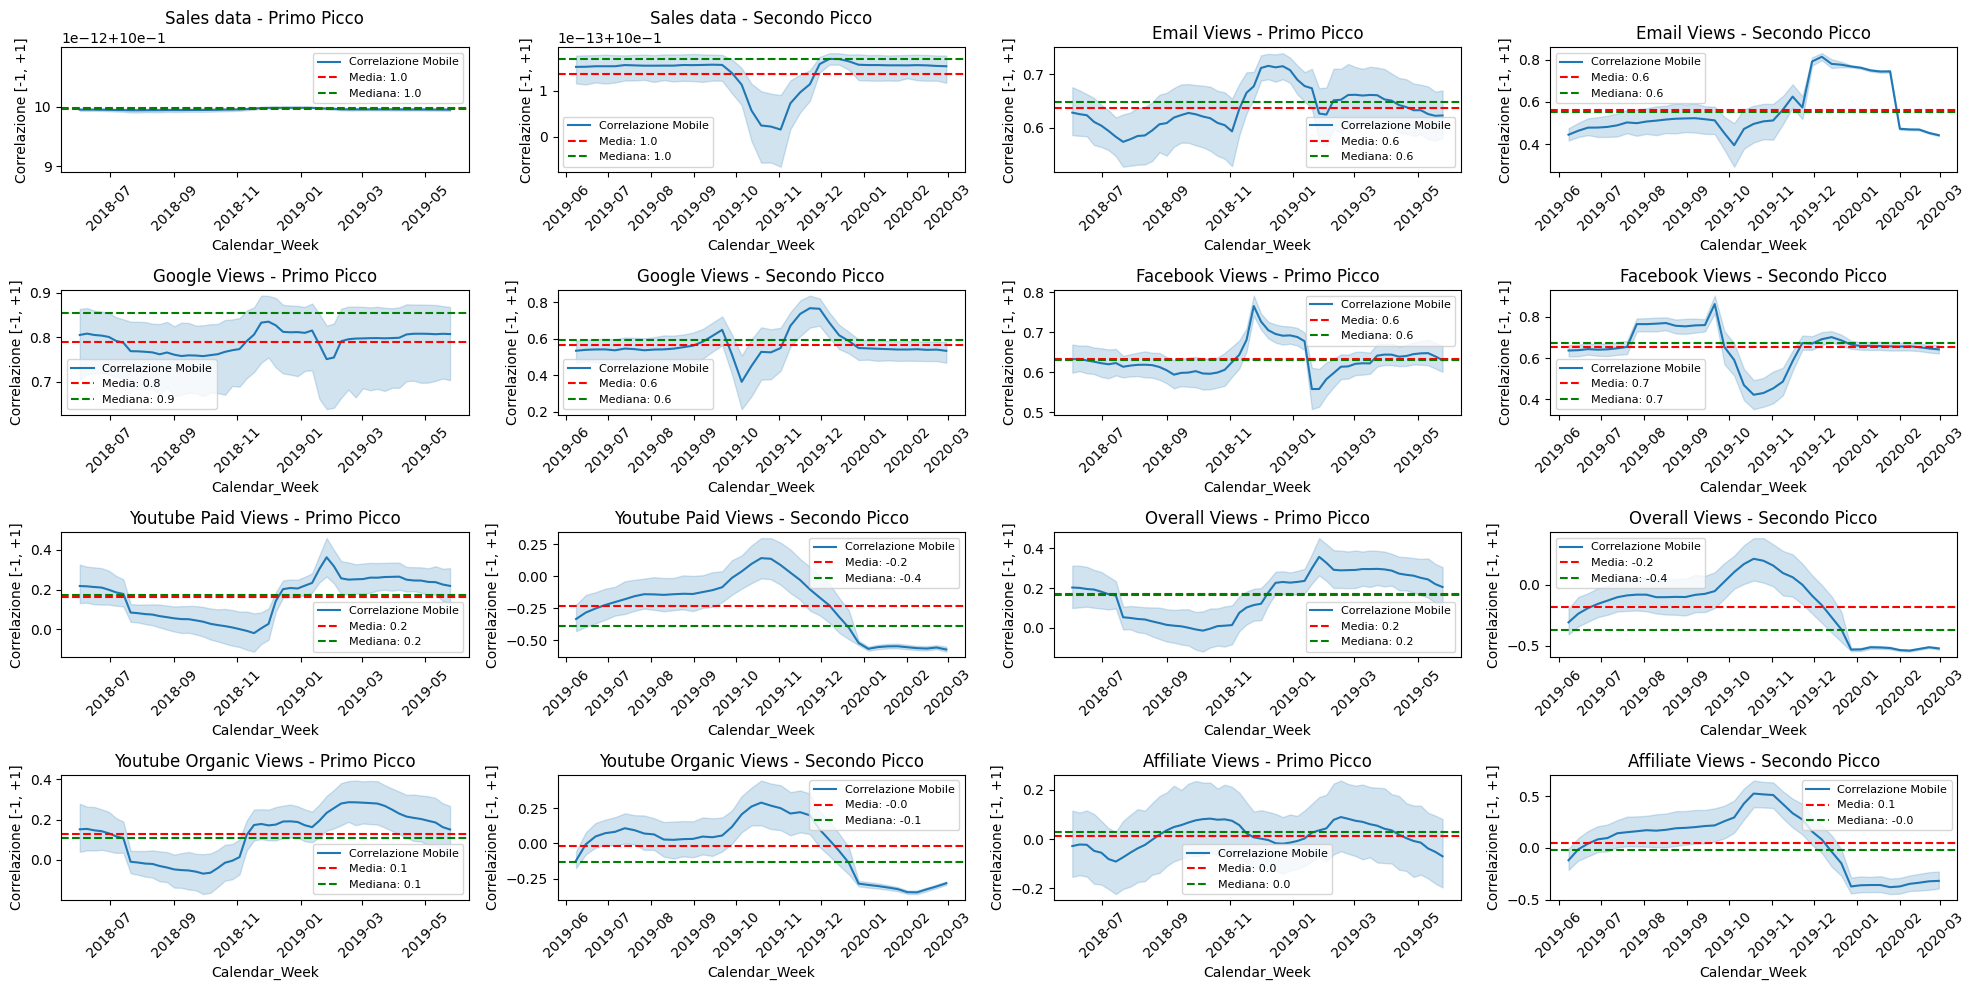

In [17]:
# Separazione dei sottoinsiemi dei dati in base al periodo dei picchi di vendite
df_primo_picco_vendite = df.loc[(df['Calendar_Week'] > '2018-06-01') & (df['Calendar_Week'] < '2019-06-01')]  # Primo picco (2018-2019)
df_secondo_picco_vendite = df.loc[(df['Calendar_Week'] > '2019-06-01') & (df['Calendar_Week'] < '2020-06-01')]  # Secondo picco (2019-2020)

# Lista delle colonne da tracciare con i relativi colori e titoli
plot_info = [
    ('Sales', 'red', 'Sales data'),  # Dati delle vendite
    ('Email_Impressions', 'red', 'Email Views'),  # Visualizzazioni delle email
    ('Google_Impressions', 'red', 'Google Views'),  # Visualizzazioni su Google
    ('Facebook_Impressions', 'red', 'Facebook Views'),  # Visualizzazioni su Facebook
    ('Paid_Views', 'red', 'Youtube Paid Views'),  # Visualizzazioni a pagamento su YouTube
    ('Overall_Views', 'red', 'Overall Views'),  # Visualizzazioni totali
    ('Organic_Views', 'red', 'Youtube Organic Views'),  # Visualizzazioni organiche su YouTube
    ('Affiliate_Impressions', 'red', 'Affiliate Views')  # Visualizzazioni affiliate
]

# Creazione di una griglia 4x4 per visualizzare i grafici
fig, axes = plt.subplots(4, 4, figsize=(20, 10))  # Griglia 4x4 con una dimensione personalizzata di 20x10

# Ciclo per calcolare e tracciare la correlazione mobile con finestra di 60 per il primo picco e 30 per il secondo
for idx, (y_col, color, title) in enumerate(plot_info):  # Itera su ogni metrica da tracciare
    # Determina la posizione del grafico sulla griglia 4x4
    row = idx // 2  # Calcola la riga (dividendo l'indice per 2)
    col_left = idx * 2 % 4  # Colonna sinistra (indice modificato per adattarsi alla griglia)
    col_right = col_left + 1  # Colonna destra (successiva alla colonna sinistra)

    try:
        # Calcolare la correlazione mobile con finestra di 60 per il primo picco e finestra di 30 per il secondo
        rolling_corr_primo = df_primo_picco_vendite[y_col].rolling(window=60).corr(df_primo_picco_vendite['Sales'])  # Finestra di 60 per il primo picco
        rolling_corr_secondo = df_secondo_picco_vendite[y_col].rolling(window=30).corr(df_secondo_picco_vendite['Sales'])  # Finestra di 30 per il secondo picco

        # # Calcolo dei massimi e minimi della correlazione mobile per il primo picco (commentato)
        # rolling_corr_primo_max = rolling_corr_primo.max()  
        # rolling_corr_primo_min = rolling_corr_primo.min()

        # # Calcolo dei massimi e minimi della correlazione mobile per il secondo picco (commentato)
        # rolling_corr_secondo_max = rolling_corr_secondo.max()  
        # rolling_corr_secondo_min = rolling_corr_secondo.min()

        # # Calcoliamo i picchi (massimi e minimi) con la corrispondente settimana nel dataset
        # p1_x_max = df_primo_picco_vendite.loc[rolling_corr_primo.idxmax(), 'Calendar_Week']
        # p1_x_min = df_primo_picco_vendite.loc[rolling_corr_primo.idxmin(), 'Calendar_Week']

        # p2_x_max = df_secondo_picco_vendite.loc[rolling_corr_secondo.idxmax(), 'Calendar_Week']
        # p2_x_min = df_secondo_picco_vendite.loc[rolling_corr_secondo.idxmin(), 'Calendar_Week']

        # Tracciare la correlazione mobile per il primo picco
        sns.lineplot(
            x=df_primo_picco_vendite['Calendar_Week'],  # Settimane del primo picco
            y=rolling_corr_primo,  # Correlazione mobile calcolata
            ax=axes[row, col_left],  # Asse della griglia
            label='Correlazione Mobile'  # Etichetta della curva
        )
        # Aggiungere una linea orizzontale per la media della correlazione
        axes[row, col_left].axhline(y=rolling_corr_primo.mean(), color='red', linestyle='--', label=f'Media: {rolling_corr_primo.mean():.1f}')
        # Aggiungere una linea orizzontale per la mediana della correlazione
        axes[row, col_left].axhline(y=rolling_corr_primo.median(), color='green', linestyle='--', label=f'Mediana: {rolling_corr_primo.median():.1f}')
        axes[row, col_left].set_title(f'{title} - Primo Picco')  # Titolo del grafico
        # (Commentato) Aggiungere le linee verticali per i picchi massimo e minimo
        # axes[row, col_left].axvline(x=p1_x_max, color='blue', linestyle=':', label=f'Picco max {rolling_corr_primo_max:.2f} il {str(p1_x_max)[:10]}')
        # axes[row, col_left].axvline(x=p1_x_min, color='orange', linestyle=':', label=f'Picco min {rolling_corr_primo_min:.2f} il {str(p1_x_min)[:10]}')
        axes[row, col_left].tick_params(axis='x', rotation=45)  # Ruotiamo le etichette sull'asse X per migliorarne la visibilità
        axes[row, col_left].set_ylabel('Correlazione [-1, +1]')  # Etichetta per l'asse Y
        axes[row, col_left].legend(fontsize=8)  # Legenda del grafico

        # Tracciare la correlazione mobile per il secondo picco
        sns.lineplot(
            x=df_secondo_picco_vendite['Calendar_Week'],  # Settimane del secondo picco
            y=rolling_corr_secondo,  # Correlazione mobile calcolata
            ax=axes[row, col_right],  # Asse della griglia
            label='Correlazione Mobile'  # Etichetta della curva
        )
        # Aggiungere una linea orizzontale per la media della correlazione
        axes[row, col_right].axhline(y=rolling_corr_secondo.mean(), color='red', linestyle='--', label=f'Media: {rolling_corr_secondo.mean():.1f}')
        # Aggiungere una linea orizzontale per la mediana della correlazione
        axes[row, col_right].axhline(y=rolling_corr_secondo.median(), color='green', linestyle='--', label=f'Mediana: {rolling_corr_secondo.median():.1f}')
        axes[row, col_right].set_title(f'{title} - Secondo Picco')  # Titolo del grafico
        # (Commentato) Aggiungere le linee verticali per i picchi massimo e minimo
        # axes[row, col_right].axvline(x=p2_x_max, color='blue', linestyle=':', label=f'Picco max {rolling_corr_secondo_max:.2f} il {str(p2_x_max)[:10]}')
        # axes[row, col_right].axvline(x=p2_x_min, color='orange', linestyle=':', label=f'Picco min {rolling_corr_secondo_min:.2f} il {str(p2_x_min)[:10]}')
        axes[row, col_right].tick_params(axis='x', rotation=45)  # Ruotiamo le etichette sull'asse X per migliorarne la visibilità
        axes[row, col_right].set_ylabel('Correlazione [-1, +1]')  # Etichetta per l'asse Y
        axes[row, col_right].legend(fontsize=8)  # Legenda del grafico

    except Exception as e:
        # Se c'è un errore nel calcolo o nella visualizzazione, disattivare gli assi corrispondenti e stampare l'errore
        axes[row, col_left].axis('off')
        axes[row, col_right].axis('off')
        print(f"Errore con la metrica '{y_col}': {e}")  # Stampa dell'errore

# Ottimizzare la visualizzazione per evitare sovrapposizioni
plt.tight_layout()  # Ottimizzazione della disposizione dei grafici
plt.show()  # Visualizzazione dei grafici

# Spiegazione del grafico precedente

## Dove e di quanto e quale Impressions ha una correlazione con il primo o con il secondo picco?

Ogni grafico visualizza la **correlazione mobile** tra una metrica di visualizzazione (come ad esempio, le visualizzazioni via email, Google, Facebook, YouTube, ecc.) e le vendite settimanali, calcolata su una finestra mobile che varia a seconda del periodo di picco (60 settimane per il primo picco e 30 settimane per il secondo picco).

### **Descrizione dei grafici:**
- **Ogni grafico** rappresenta la correlazione mobile tra una metrica di visualizzazione specifica (ad esempio, le visualizzazioni email, Google, o YouTube) e le vendite settimanali. La correlazione mobile viene calcolata utilizzando una finestra mobile, che è di 60 settimane per il primo picco (2018-2019) e di 30 settimane per il secondo picco (2019-2020).
- **Le linee nei grafici** indicano come varia la correlazione tra la metrica e le vendite nel tempo. L'asse X mostra le settimane del periodo analizzato (presente nella colonna **Calendar_Week** del DataFrame).
- **Le linee orizzontali** in ciascun grafico mostrano due valori di riferimento: la **media** della correlazione (in rosso) e la **mediana** della correlazione (in verde). Queste linee permettono di osservare la tendenza centrale della correlazione nel periodo analizzato.
- **La legenda** in ogni grafico include le etichette per la correlazione mobile, nonché per le linee di media e mediana, per facilitare la comprensione dei dati.

### **Osservazioni:**
- I grafici rivelano come alcune metriche, come **Google**, **Email** e **Facebook**, tendano a mantenere correlazioni più stabili con le vendite nel tempo, mentre altre metriche, come le **visualizzazioni organiche** e le **visualizzazioni a pagamento**, presentano picchi di correlazione più evidenti in determinati periodi. 
- È interessante notare che le **visualizzazioni** (ad esempio, tramite Google o YouTube) mostrano picchi di correlazione positiva che possono indicare periodi in cui le vendite sono fortemente influenzate da queste metriche. Tuttavia, questi picchi sono fluttuanti e non continuativi nel tempo, suggerendo che l'influenza delle metriche di visualizzazione sulle vendite non è costante.
- Questi grafici sono stati progettati per **evidenziare i momenti di picco** (sia positivi che negativi) nella correlazione tra le vendite e le metriche di visualizzazione, permettendo di comprendere meglio in che momenti le azioni di marketing hanno avuto un impatto significativo sulle vendite.

### **Sintesi:**
In sintesi, questi grafici offrono una panoramica visiva delle correlazioni dinamiche tra le diverse metriche di visualizzazione e le vendite nel tempo. Mettono in evidenza le fluttuazioni significative e i periodi di maggiore impatto delle variabili sulle vendite, fornendo utili indicazioni per ottimizzare le strategie di marketing in base ai picchi di correlazione osservati.

&nbsp;

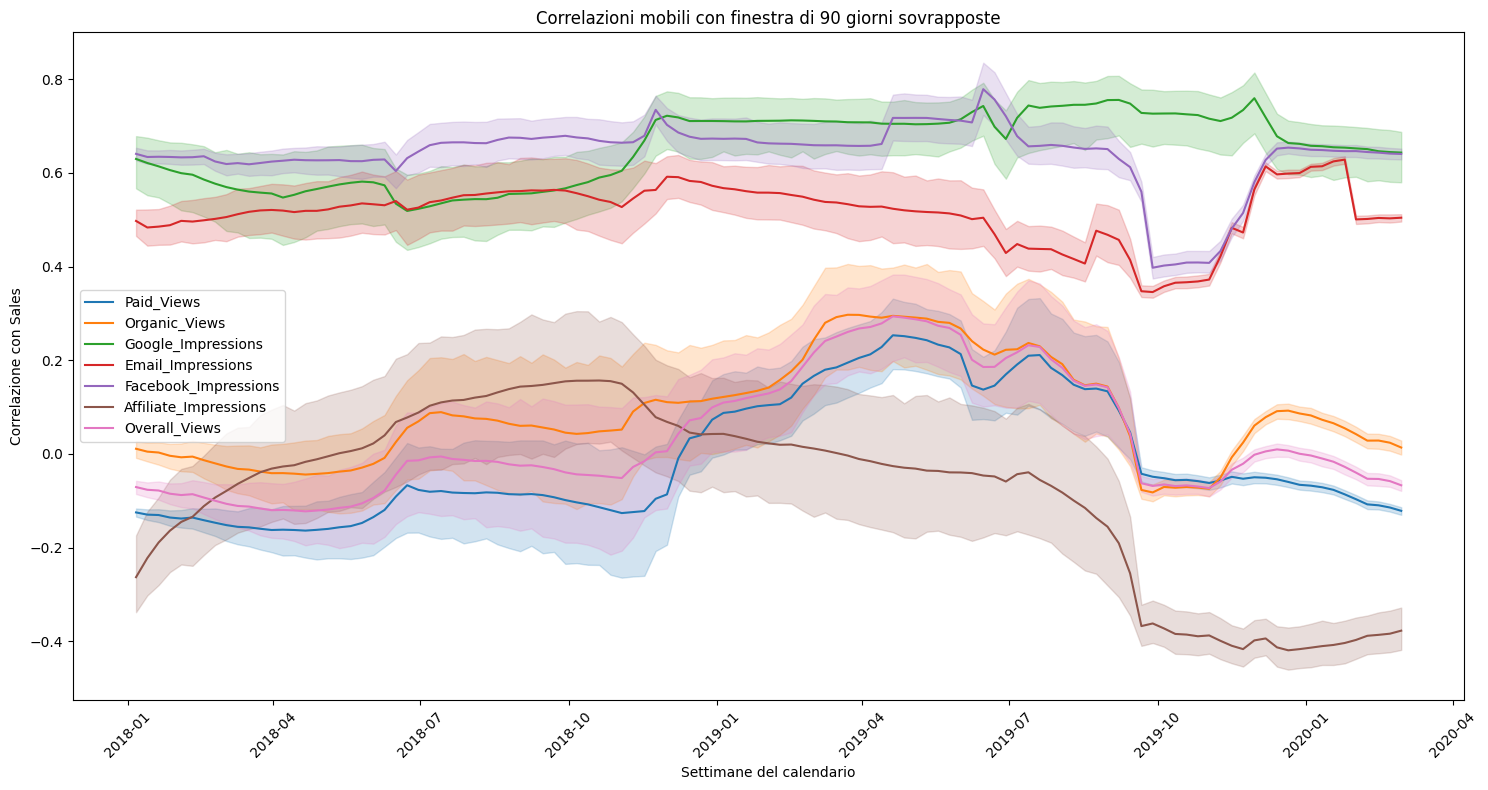

In [18]:
# Creazione del grafico unico
plt.figure(figsize=(15, 8))  # Impostiamo la dimensione del grafico

# Lista delle metriche da visualizzare
colonne = df.columns[2:9]  # Selezione delle colonne (dal secondo al nono) da analizzare nel DataFrame 'df'

# Ciclo per disegnare ciascun lineplot in un unico grafico
for col in colonne:
    try:
        # Calcolare la correlazione mobile con finestra di 90 giorni (finestra di 90 per 3 mesi)
        rolling_corr = df[col].rolling(window=90).corr(df['Sales'])  # Correlazione mobile tra la metrica e le vendite

        # Disegnare la correlazione mobile per ciascuna metrica
        sns.lineplot(x=df['Calendar_Week'], y=rolling_corr, label=col)  # Grafico delle correlazioni mobili per ogni metrica
    except Exception as e:
        # Gestione degli errori nel caso in cui una metrica non possa essere processata
        print(f"Errore con la metrica '{col}': {e}")  # Stampa dell'errore se si verifica un problema

# Ottimizzare il grafico
plt.xlabel('Settimane del calendario')  # Etichetta per l'asse X
plt.ylabel('Correlazione con Sales')  # Etichetta per l'asse Y
plt.title('Correlazioni mobili con finestra di 90 giorni sovrapposte')  # Titolo del grafico
plt.xticks(rotation=45)  # Ruotiamo le etichette sull'asse X per una lettura migliore
plt.legend(fontsize=10)  # Aggiungiamo la legenda con una dimensione del testo di 10
plt.tight_layout()  # Ottimizzazione della disposizione dei grafici per evitare sovrapposizioni
plt.show()  # Visualizzazione del grafico

# Spiegazione del grafico precedente

## Come appiaiono tutte le correlzioni tra Impressions e vendite sovrapposte? Si nota qualche divisione netta?

Il grafico visualizza la **correlazione mobile** tra diverse metriche (come le visualizzazioni delle email, impression su Google, Facebook, ecc.) e le **vendite settimanali**. La correlazione mobile è calcolata usando una finestra di **90 giorni**, che corrisponde a circa 3 mesi di dati. Questo approccio aiuta a comprendere come le relazioni tra le variabili possano evolversi nel tempo, evidenziando i periodi in cui la metrica è particolarmente correlata con le vendite.

### Descrizione dei grafici:
- **Ogni linea nel grafico** rappresenta la correlazione mobile tra una specifica metrica (ad esempio, le impression su Google, le views organiche su YouTube, ecc.) e le vendite settimanali. La correlazione mobile è calcolata su una finestra mobile di 90 giorni.
- **L'asse X** rappresenta le settimane del calendario, indicate dalla colonna **Calendar_Week** del DataFrame, mentre **l'asse Y** mostra la correlazione tra la metrica e le vendite, con valori che vanno da -1 a +1.
- **Le linee nel grafico** permettono di osservare come la correlazione tra la metrica e le vendite cambi nel tempo. Ogni picco o caduta rappresenta un cambiamento nella forza della relazione tra la metrica e le vendite.
- **La legenda** indica le metriche analizzate, così che ogni linea possa essere associata a una specifica metrica (es. Google, Facebook, Paid_Views, ecc.).

### Osservazioni:
- Come si può notare, alcune metriche, come le **visualizzazioni di Google**, le **Email** e **Facebook**, tendono a mostrare correlazioni più forti con le vendite, mentre le altre metriche, come **Paid_Views**, **Organic_Views** ecc, hanno picchi di correlazione in periodi specifici. Questo suggerisce che le **impression** o altre metriche potrebbero avere un impatto più forte sulle vendite solo in alcuni momenti.
- I grafici permettono di identificare **picchi di correlazione** che indicano i momenti in cui una particolare metrica è particolarmente influente nelle vendite. Questi picchi potrebbero corrispondere a periodi di promozioni speciali, eventi stagionali o altre influenze esterne.
- È interessante notare che anche se una metrica ha una correlazione relativamente bassa (ad esempio, un picco di 0.40), essa potrebbe comunque avere un impatto significativo durante determinati periodi, che è il punto principale di questa analisi.

### Conclusioni:
In sintesi, questi grafici offrono una **panoramica visiva** della **correlazione dinamica** tra diverse metriche e le vendite settimanali. I picchi di correlazione e le variazioni nel tempo evidenziano tendenze e fluttuazioni che possono essere utili per comprendere come le diverse attività di marketing e canali influenzano le vendite, permettendo decisioni strategiche più informate.

&nbsp;

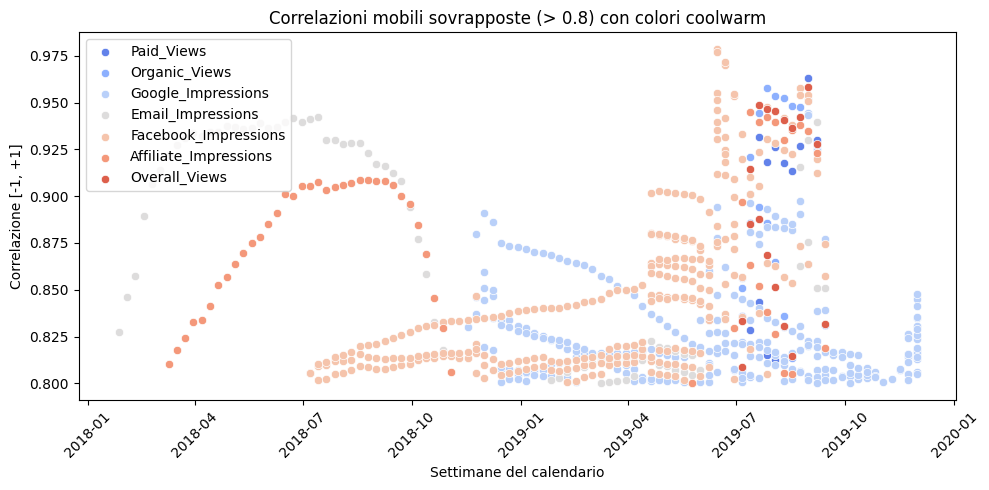

In [19]:
# Creazione dinamica del grafico unico
fig, ax = plt.subplots(figsize=(10, 5))  # Creiamo una finestra di grafico di dimensioni 10x5

# Lista delle metriche da visualizzare
colonne = df.columns[2:9]  # Selezioniamo le colonne (dal secondo al nono) del DataFrame 'df' da analizzare

# Creazione di una scala di colori con "coolwarm"
colors = sns.color_palette("coolwarm", len(colonne))  # Generiamo una scala di colori "coolwarm" in base al numero di metriche

# Ciclo per sovrapporre ciascun grafico con la sua correlazione mobile
for idx, col in enumerate(colonne):  # Per ogni metrica nella lista delle colonne
    try:
        # Calcolare la correlazione mobile con finestra di 90 giorni
        rolling_corr = df[col].rolling(window=90).corr(df['Sales'])  # Calcoliamo la correlazione mobile della metrica con le vendite

        # Applicare la maschera per considerare solo i valori di correlazione maggiore di 0.8
        mask = rolling_corr > 0.8  # Creiamo una maschera che seleziona solo i valori di correlazione superiore a 0.8

        # Disegnare il grafico sovrapposto solo con la porzione di dati che ha una correlazione > 0.8
        sns.scatterplot(x=df['Calendar_Week'][mask], y=rolling_corr[mask], ax=ax, label=col, color=colors[idx])
        # Utilizziamo scatterplot per tracciare solo i punti che soddisfano la maschera, colorando ogni metrica con un colore diverso
    except Exception as e:  # Se si verifica un errore durante il calcolo o la visualizzazione
        print(f"Errore con la metrica '{col}': {e}")  # Stampa l'errore per la metrica che ha causato il problema

# Impostazioni titoli e leggibilità
ax.set_title('Correlazioni mobili sovrapposte (> 0.8) con colori coolwarm')  # Titolo del grafico
ax.set_xlabel('Settimane del calendario')  # Etichetta per l'asse X
ax.set_ylabel('Correlazione [-1, +1]')  # Etichetta per l'asse Y
ax.tick_params(axis='x', rotation=45)  # Ruotiamo le etichette sull'asse X per migliorare la leggibilità

# Leggibilità migliorata con la leggenda
plt.legend(loc="upper left")  # Posizioniamo la legenda nell'angolo in alto a sinistra
plt.tight_layout()  # Ottimizza la disposizione dei grafici per evitare sovrapposizioni
plt.show()  # Visualizza il grafico risultante

# Spiegazione del grafico precedente

## Dove e come sono distribuite le correlazioni tra il tipo di Impression e le vendite che hanno una correlazione maggiore di 0.8?

Il grafico mostra la **correlazione mobile** tra diverse metriche (come le visualizzazioni delle email, le impression su Google, Facebook, e altre) e le **vendite settimanali**. La correlazione mobile viene calcolata utilizzando una finestra di **90 giorni**, che corrisponde a circa tre mesi. Il filtro applicato seleziona solo i periodi in cui la correlazione è maggiore di **0.8**, per evidenziare i momenti in cui la relazione tra la metrica e le vendite è particolarmente forte.

### Descrizione del grafico:
- **Ogni punto** nel grafico rappresenta il valore della correlazione mobile tra una metrica specifica (ad esempio, le impression su Google, le visualizzazioni organiche su YouTube, ecc.) e le vendite settimanali. La correlazione mobile è calcolata su una finestra mobile di 90 giorni.
- **L'asse X** mostra le settimane del calendario, tratte dalla colonna **Calendar_Week** del DataFrame. Ogni punto sulla linea corrisponde al valore della correlazione in una settimana specifica.
- **L'asse Y** rappresenta il valore della correlazione tra la metrica e le vendite, con valori che variano da -1 (correlazione negativa) a +1 (correlazione positiva).
- **Solo i punti con correlazione superiore a 0.8** sono visualizzati nel grafico, grazie a un filtro che seleziona i periodi con una correlazione significativamente alta. Questo aiuta a concentrarsi sui momenti in cui la relazione tra la metrica e le vendite è particolarmente forte.
- **Le linee nel grafico** permettono di osservare come la correlazione tra la metrica e le vendite cambi nel tempo. Ogni picco o discesa della linea indica una variazione nell'intensità di questa relazione.
- **La legenda** indica quale metrica corrisponde a ciascuna linea, rendendo facile l'identificazione di metriche come Google, Facebook, Paid_Views, ecc.

### Osservazioni:
- Alcune metriche, come le **visualizzazioni su Google**, le **Email** e **Facebook**, mostrano una correlazione costante e forte con le vendite, suggerendo che questi canali influenzano significativamente le vendite nel tempo.
- Altre metriche, come **Paid_Views** e **Organic_Views**, mostrano picchi di correlazione in periodi specifici. Questo suggerisce che l'impatto di queste variabili sulle vendite può essere più episodico, influenzando le vendite solo in momenti particolari.
- Il grafico aiuta a identificare **i picchi di correlazione**, che potrebbero rappresentare i periodi in cui una metrica ha avuto un'influenza maggiore sulle vendite. Questi picchi potrebbero corrispondere a eventi particolari, come promozioni speciali o stagioni di alta domanda.

### Conclusioni:
In sintesi, questo grafico fornisce una **visualizzazione chiara** della **correlazione dinamica** tra le diverse metriche e le vendite settimanali. Il filtro per **correlazioni superiori a 0.8** permette di concentrarsi sui momenti in cui la relazione tra una metrica e le vendite è particolarmente forte, evidenziando tendenze e picchi significativi. Questa analisi aiuta a comprendere meglio come le diverse attività di marketing influenzino le vendite e offre spunti utili per prendere decisioni strategiche più mirate.

&nbsp;

In [20]:
# Lista delle metriche da visualizzare
colonne = df.columns[2:9]  # Selezioniamo le colonne (dal secondo all'ottavo) del DataFrame 'df' per calcolare la correlazione

# Calcolo dinamico delle correlazioni mobili
rolling_data = []  # Lista che conterrà i dati di correlazione mobile per ogni metrica

window_size = 90  # Impostiamo la finestra mobile dinamica (può essere facilmente cambiata in seguito)

# Ciclo per calcolare la correlazione mobile per ogni colonna selezionata
for col in colonne:
    try:
        # Calcolare la correlazione mobile tra la metrica corrente e le vendite, usando una finestra di 'window_size'
        rolling_corr = df['Sales'].rolling(window=window_size).corr(df[col])

        # Applicare una maschera per selezionare solo i valori di correlazione maggiori di un determinato valore (0.65 in questo caso)
        corr = 0.65
        mask = (rolling_corr > corr)  # Maschera che seleziona i valori di correlazione maggiori di 0.65

        # Indici validi dove la maschera è True
        valid_indices = rolling_corr.index[mask]

        # Estraiamo le correlazioni valide e le settimane corrispondenti
        valid_corr = rolling_corr.loc[valid_indices]
        valid_weeks = df.loc[valid_indices, 'Calendar_Week']

        # Aggiungere solo i dati validi alla lista rolling_data
        if not valid_corr.empty:
            rolling_data.append({
                "column": col,  # Nome della metrica
                "week": valid_weeks,  # Le settimane corrispondenti
                "rolling_corr": valid_corr  # Le correlazioni calcolate
            })
    except Exception as e:
        # Se si verifica un errore durante il calcolo della correlazione, stampiamo un messaggio di errore
        print(f"Errore con la metrica '{col}': {e}")

# Creazione di un DataFrame per visualizzare i risultati con Plotly
filtered_df = pd.DataFrame({
    "week": [],  # Colonna vuota per le settimane
    "rolling_corr": [],  # Colonna vuota per le correlazioni
    "column": []  # Colonna vuota per il nome della metrica
})

# Combinazione di tutti i dati calcolati in un unico DataFrame per Plotly
for data in rolling_data:
    # Per ogni set di dati calcolati, creiamo un DataFrame temporaneo
    temp_df = pd.DataFrame({
        "week": data["week"],  # Set di settimane
        "rolling_corr": data["rolling_corr"],  # Correlazioni mobili
        "column": [data["column"]] * len(data["rolling_corr"])  # Ripetiamo il nome della metrica per ogni settimana
    })
    # Aggiungiamo il DataFrame temporaneo a filtered_df
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)

# Calcolare l'andamento settimanale delle vendite medie
weekly_sales = df.groupby('Calendar_Week')['Sales'].mean().reset_index()  # Raggruppiamo per settimana e calcoliamo la media delle vendite
weekly_sales.rename(columns={"Sales": "weekly_mean_sales"}, inplace=True)  # Rinominiamo la colonna delle vendite

# Creazione del grafico combinato
fig = go.Figure()  # Creiamo una figura vuota per aggiungere i tracciati

# Aggiungiamo uno scatter plot per ogni metrica e la sua correlazione mobile
for col in filtered_df['column'].unique():
    # Filtriamo i dati per ogni metrica
    col_df = filtered_df[filtered_df['column'] == col]
    # Aggiungiamo il tracciato (scatter plot) per la metrica corrente
    fig.add_trace(go.Scatter(
        x=col_df['week'],  # Le settimane
        y=col_df['rolling_corr'],  # Le correlazioni mobili
        mode='markers',  # Utilizziamo marker per visualizzare i punti
        name=col  # Nome della metrica
    ))

# Aggiungiamo la linea delle vendite settimanali su un asse Y separato
fig.add_trace(go.Scatter(
    x=weekly_sales["Calendar_Week"],  # Le settimane
    y=weekly_sales["weekly_mean_sales"],  # Le vendite settimanali medie
    mode='lines+markers',  # Linea con marcatori per visualizzare i punti
    name="Vendite settimanali",  # Nome della serie
    yaxis="y2",  # Asse Y separato per le vendite
    line=dict(color="grey")  # Colore grigio per la linea delle vendite
))

# Aggiorniamo il layout per aggiungere una seconda scala Y per le vendite settimanali
fig.update_layout(
    title=f"Correlazioni mobili > {corr} con finestra mobile di {window_size} giorni e vendite settimanali",  # Titolo del grafico
    xaxis_title="Settimane del calendario",  # Etichetta per l'asse X
    yaxis=dict(
        title="Correlazione con Sales",  # Etichetta per l'asse Y delle correlazioni
        side="left"  # Posizione a sinistra dell'asse Y
    ),
    yaxis2=dict(
        title="Vendite settimanali",  # Etichetta per la seconda Y
        overlaying="y",  # Sovrappone il secondo asse Y al primo
        side="right"  # Posizione a destra per il secondo asse Y
    ),
    showlegend=True  # Mostriamo la legenda
)

# Mostriamo il grafico
fig.show()  # Visualizziamo il grafico interattivo

# Spiegazione del grafico precedente

## Dove e come sono distribuite le correlazioni tra il tipo di Impression e le vendite che hanno una correlazione maggiore di 0.65?

Il grafico visualizza la **correlazione mobile** tra diverse impressions (Email,Google, Facebook ecc) e le **vendite settimanali**. La correlazione mobile viene calcolata utilizzando una finestra dinamica di **90 giorni**, corrispondente a circa tre mesi. Per concentrarsi sui periodi in cui la relazione tra le metriche e le vendite è particolarmente forte, è stato applicato un **filtro che seleziona solo le correlazioni superiori a 0.65**.

### Descrizione del Grafico:
- **Ogni punto** nel grafico rappresenta il valore della correlazione mobile tra una metrica specifica e le vendite settimanali. La correlazione è calcolata utilizzando una finestra mobile di 90 giorni.
- **L'asse X** mostra le settimane del calendario, estratte dalla colonna **Calendar_Week** del DataFrame. Ogni punto sulla linea corrisponde alla correlazione calcolata per una settimana specifica.
- **L'asse Y** rappresenta la **correlazione mobile** tra l'impressions e le vendite, con valori che variano da -1 (correlazione negativa) a +1 (correlazione positiva).
- **I punti** visibili nel grafico sono quelli con **correlazione superiore a 0.65**, grazie al filtro applicato che aiuta a focalizzarsi sui periodi in cui la relazione tra l'impressions e le vendite è particolarmente forte.
- **Ogni metrica** è rappresentata da un tracciato separato, con i punti che riflettono i valori delle correlazioni mobili. Le linee mostrano la tendenza delle correlazioni nel tempo, con picchi che indicano i momenti in cui la relazione tra la metrica e le vendite è particolarmente forte.
- **La legenda** nel grafico consente di identificare facilmente quale metrica è rappresentata da ciascun tracciato (ad esempio, **Google**, **Facebook**, **Paid_Views**), permettendo una rapida interpretazione visiva.

### Tooltip:
- I **tooltip** mostrano informazioni dettagliate quando si passa il mouse sopra un punto del grafico. Ogni tooltip contiene:
    - Il nome della **metrica** associata al punto (ad esempio, "Google", "Facebook", "Paid_Views").
    - La **data** del calendario, espressa in formato **MM-DD-YYYY**, che indica la data a cusi si riferisce la correlazione.
    - Il valore della **correlazione mobile** tra la metrica e le vendite per quella settimana.

    Esempio di tooltip:
    - "(Mese, Giorno, Anno, Correlazione) Nome: (May, 4, 2019, 0.73) Facebook_Impressions"

### Vendite Settimanali:
- Le **vendite settimanali** sono visualizzate come una **linea grigia** sovrapposta al grafico delle correlazioni mobili. Questa linea mostra l'andamento delle vendite medie settimanali su un asse **Y separato** a destra, consentendo di confrontare facilmente le tendenze delle vendite con le correlazioni mobili delle metriche.
- La **linea delle vendite settimanali** è rappresentata come un **tracciato a linee e marcatori**, per permettere una visibilità chiara e dettagliata.

### Osservazioni:
- Le metriche, come le **Google_Impressions**, **Email_Impressions** e **Facebook_Impressions**, mostrano una **correlazione stabile e forte** con le vendite. Questo suggerisce che questi canali influenzano le vendite in modo costante e prevedibile.
- Altre metriche, come le **Paid_Views** e le **Organic_Views**, evidenziano **picchi di correlazione** in periodi specifici. Ciò suggerisce che l'effetto di queste variabili sulle vendite è più **episodico** e potrebbe essere legato a eventi particolari (ad esempio, promozioni speciali o stagioni ad alta domanda).
- Il grafico permette di identificare facilmente i **picchi di correlazione**, che possono indicare periodi in cui una metrica ha avuto un impatto significativo sulle vendite.

### Conclusioni:
In sintesi, questo grafico offre una **visualizzazione chiara** della **correlazione dinamica** tra diverse metriche e le vendite settimanali. L'applicazione del filtro per **correlazioni superiori a 0.65** aiuta a concentrarsi sui periodi in cui la relazione tra una metrica e le vendite è particolarmente forte. L'inclusione delle **vendite settimanali** con una scala Y separata consente di analizzare simultaneamente l'andamento delle vendite rispetto alle variazioni delle correlazioni con le metriche selezionate. Questa analisi offre spunti utili per prendere **decisioni strategiche mirate**, ottimizzando le attività di marketing e migliorando le performance di vendita.

&nbsp;

In [21]:
# Lista delle metriche da visualizzare
colonne = df.columns[2:9]  # Selezioniamo le colonne (dal secondo all'ottavo) del DataFrame 'df' per calcolare la correlazione

# Calcolo dinamico delle correlazioni mobili
rolling_data = []  # Lista che conterrà i dati di correlazione mobile per ogni metrica
window_size = 90  # Impostiamo la finestra mobile dinamica
corr_threshold = 0.65  # Impostazione della soglia minima di correlazione

# Ciclo per calcolare la correlazione mobile per ogni colonna selezionata
for col in colonne:
    try:
        # Calcolare la correlazione mobile tra la metrica corrente e le vendite, usando una finestra di 'window_size'
        rolling_corr = df['Sales'].rolling(window=window_size).corr(df[col])

        # Mascherare solo i valori di correlazione superiori alla soglia
        mask = rolling_corr > corr_threshold  # Maschera che seleziona i valori di correlazione maggiori di 0.65
        valid_corr = rolling_corr[mask]  # Estraiamo le correlazioni valide (maggiore di 0.65)
        valid_weeks = df.loc[mask, 'Calendar_Week']  # Estraiamo le settimane corrispondenti alle correlazioni valide

        # Aggiungere solo i dati validi alla lista rolling_data
        if not valid_corr.empty:
            rolling_data.append({
                "column": col,  # Nome della metrica
                "week": valid_weeks,  # Le settimane corrispondenti
                "rolling_corr": valid_corr  # Le correlazioni calcolate
            })
    except Exception as e:
        # Se si verifica un errore durante il calcolo della correlazione, stampiamo un messaggio di errore
        print(f"Errore con la metrica '{col}': {e}")

# Creazione di un DataFrame per visualizzare i risultati con Plotly
filtered_df = pd.DataFrame({
    "week": [],  # Colonna vuota per le settimane
    "rolling_corr": [],  # Colonna vuota per le correlazioni
    "column": []  # Colonna vuota per il nome della metrica
})

# Combiniamo tutti i dati calcolati in un unico DataFrame per Plotly
for data in rolling_data:
    temp_df = pd.DataFrame({
        "week": data["week"],  # Set di settimane
        "rolling_corr": data["rolling_corr"],  # Correlazioni mobili
        "column": [data["column"]] * len(data["rolling_corr"])  # Ripetiamo il nome della metrica per ogni settimana
    })
    # Aggiungiamo il DataFrame temporaneo a filtered_df
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)

# Calcolare il conteggio settimanale di ciascuna metrica distinta
weekly_count_corr = filtered_df.groupby(['week', 'column']).size().reset_index(name="count_corr")  # Raggruppiamo per settimana e metrica, conteggiando le occorrenze

# Calcolare l'andamento settimanale delle vendite medie
weekly_sales = df.groupby('Calendar_Week')['Sales'].mean().reset_index()  # Raggruppiamo per settimana e calcoliamo la media delle vendite
weekly_sales.rename(columns={"Sales": "weekly_mean_sales", "Calendar_Week": "week"}, inplace=True)  # Rinominiamo la colonna delle vendite

# Creazione grafico con Plotly
fig = go.Figure()  # Creiamo una figura vuota per aggiungere i tracciati

# Aggiungiamo un grafico a barre per ciascuna metrica, con dettagli nel tooltip
for col in weekly_count_corr['column'].unique():  # Iteriamo su ogni metrica unica
    col_df = weekly_count_corr[weekly_count_corr['column'] == col]  # Filtriamo i dati per la metrica corrente
    
    # Aggiunta delle informazioni al tooltip con dettagli aggiuntivi
    fig.add_trace(go.Bar(
        x=col_df['week'],  # Le settimane
        y=col_df['count_corr'],  # Conteggio delle correlazioni superiori a 0.65
        name=col,  # Nome della metrica
        marker=dict(opacity=0.7),  # Impostiamo l'opacità delle barre
        text=[  # Dettagli da visualizzare nel tooltip
            f"Impression: {col}<br>"
            f"Settimana: {week.strftime('%Y-%U')}<br>"
            f"Conteggio correlazioni: {count}"
            for week, count in zip(col_df['week'], col_df['count_corr'])  # Creiamo il testo per ogni settimana
        ],
        textposition='auto',  # Posizioniamo automaticamente il testo sulle barre
        hoverinfo="text"  # Mostriamo solo le informazioni testuali nel tooltip
    ))

# Sovrapposizione delle vendite settimanali con scala separata
fig.add_trace(go.Scatter(
    x=weekly_sales["week"],  # Le settimane
    y=weekly_sales["weekly_mean_sales"],  # Le vendite settimanali medie
    mode='lines+markers',  # Linea con marcatori per visualizzare i punti
    name="Vendite settimanali",  # Nome della serie
    line=dict(color="black", width=2),  # Linea nera per le vendite
    yaxis="y2"  # Asse Y separato per le vendite settimanali
))

# Aggiornamento layout con due scale Y
fig.update_layout(
    title=f"Conteggio delle correlazioni > di {corr_threshold} settimanali per ciascun impressions con finestra mobile di {window_size} giorni e con vendite settimanali sovrapposte",  # Titolo del grafico
    xaxis_title="Settimane del calendario",  # Etichetta per l'asse X
    yaxis=dict(
        title=f"Conteggio delle correlazioni superiori a {corr_threshold}"  # Etichetta per l'asse Y delle correlazioni
    ),
    yaxis2=dict(
        title="Vendite settimanali",  # Etichetta per la seconda Y
        overlaying="y",  # Sovrappone il secondo asse Y al primo
        side="right"  # Posizione a destra per il secondo asse Y
    ),
    barmode="group",  # Le barre vengono raggruppate
    showlegend=True  # Mostriamo la legenda
)

# Mostrare il grafico
fig.show()  # Visualizziamo il grafico interattivo

# Spiegazione del grafico precedente

## Dove e quante correlazioni settimanali sono state trovate fra singola Impressions e le vendite?

Il grafico mostra l'andamento settimanale delle **correlazioni mobili** tra diverse metriche di marketing (come impression su Google, Facebook, visualizzazioni a pagamento, ecc.) e le **vendite settimanali**. Ogni metrica viene analizzata attraverso una **finestra mobile di 90 giorni**, che evidenzia le settimane in cui la correlazione tra la metrica e le vendite è particolarmente forte, cioè superiore alla soglia di **0.65**.

### Dettaglio del Grafico:

1. **Barre (conteggio delle correlazioni):**
   - Ogni barra rappresenta il **conteggio settimanale** delle correlazioni superiori a 0.65 tra una metrica e le vendite.
   - L'asse **X** mostra le **settimane del calendario**.
   - L'asse **Y** (a sinistra) mostra il numero di **correlazioni valide** (superiori alla soglia di 0.65) per ciascuna settimana.
   - Le **barre** sono colorate per rappresentare ciascuna metrica e l'**etichetta nel tooltip** fornisce ulteriori dettagli come il nome della metrica, la settimana e il conteggio delle correlazioni.
   
2. **Linea delle vendite settimanali:**
   - La **linea nera** mostra l'andamento delle **vendite settimanali medie**. 
   - Questa linea è tracciata su un **asse Y separato** (a destra), che permette di visualizzare facilmente le vendite settimanali in relazione alle correlazioni mobili.
   
3. **Tooltips interattivi:**
   - Quando si passa il mouse sopra una barra, appare un **tooltip** con informazioni aggiuntive, come il nome della metrica, la settimana di riferimento e il conteggio delle correlazioni.
   
4. **Legenda:**
   - La **legenda** identifica chiaramente le metriche associate a ciascuna barra, rendendo facile distinguere tra le diverse variabili analizzate (ad esempio, Google, Facebook, Paid Views, ecc.).

### Osservazioni:

- Il grafico aiuta a visualizzare quando **specifiche metriche di marketing** (come impression e visualizzazioni) hanno avuto una correlazione forte con le vendite, offrendo una comprensione chiara dei periodi in cui le attività di marketing hanno influenzato maggiormente le performance di vendita.
- Le barre più alte indicano settimane in cui le correlazioni tra la metrica e le vendite sono state particolarmente forti, mentre la linea delle vendite offre un contesto per vedere come queste correlate si sovrappongono all'andamento delle vendite settimanali.
- La combinazione di grafici a barre per le correlazioni e la linea per le vendite settimanali aiuta a visualizzare sia i **picchi di correlazione** che l'**andamento delle vendite**, evidenziando eventuali pattern o tendenze che potrebbero essere utilizzate per ottimizzare le strategie di marketing future.

### Conclusioni:

In sintesi, questo grafico offre una **visualizzazione interattiva e dinamica** delle correlazioni tra le attività di marketing e le vendite settimanali. La separazione tra le correlazioni delle metriche e le vendite settimanali su due scale Y consente di confrontare chiaramente come ogni metrica influenzi le vendite nel tempo, aiutando a identificare dove e quanto sfruttare una determinata impressions.

&nbsp;

In [22]:
# Lista delle metriche da visualizzare
colonne = df.columns[2:9]  # Selezione delle colonne da analizzare, escludendo la prima colonna (presumibilmente l'indice o ID)

# Calcolo dinamico delle correlazioni mobili
rolling_data = []
window_size = 90  # Impostiamo la finestra mobile dinamica di 90 giorni
corr_threshold = 0.65  # Impostazione della soglia minima di correlazione per considerare solo correlazioni significative

# Loop per calcolare la correlazione mobile per ciascuna metrica
for col in colonne:
    try:
        # Calcolare la correlazione mobile su finestra di window_size
        rolling_corr = df['Sales'].rolling(window=window_size).corr(df[col])

        # Mascherare solo i valori di correlazione che sono superiori alla soglia corr_threshold
        mask = rolling_corr > corr_threshold
        valid_corr = rolling_corr[mask]  # Filtrare le correlazioni valide
        valid_weeks = df.loc[mask, 'Calendar_Week']  # Ottenere le settimane corrispondenti

        # Convertire la settimana in una scala mensile per aggregare i dati
        valid_months = valid_weeks.dt.to_period('M').dt.to_timestamp()

        # Se ci sono correlazioni valide, aggiungere i dati alla lista
        if not valid_corr.empty:
            rolling_data.append({
                "column": col,
                "month": valid_months,
                "rolling_corr": valid_corr
            })
    except Exception as e:
        # Gestire eventuali errori e visualizzare quale metrica ha generato l'errore
        print(f"Errore con la metrica '{col}': {e}")

# Creare un DataFrame per visualizzare i risultati con Plotly
filtered_df = pd.DataFrame({
    "month": [],  # Colonna vuota per i mesi
    "rolling_corr": [],  # Colonna vuota per le correlazioni
    "column": []  # Colonna vuota per la metrica
})

# Aggiungere i dati di correlazione validi al DataFrame
for data in rolling_data:
    temp_df = pd.DataFrame({
        "month": data["month"],
        "rolling_corr": data["rolling_corr"],
        "column": [data["column"]] * len(data["rolling_corr"])  # Ripetere il nome della metrica per ogni correlazione
    })
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)  # Unire i dati al DataFrame finale

# Calcolo del conteggio mensile di ciascuna metrica distinta
monthly_count_corr = filtered_df.groupby(['month', 'column']).size().reset_index(name="count_corr")

# Calcolare l'andamento settimanale delle vendite medie
weekly_sales = df.groupby('Calendar_Week')['Sales'].mean().reset_index()
weekly_sales.rename(columns={"Sales": "weekly_mean_sales", "Calendar_Week": "week"}, inplace=True)

# Creazione grafico con Plotly
fig = go.Figure()

# Grafici a barre mensili distinti per ciascun impression/colonna
for col in monthly_count_corr['column'].unique():
    col_df = monthly_count_corr[monthly_count_corr['column'] == col]  # Filtrare il DataFrame per ciascuna metrica
    
    # Aggiungere le informazioni al tooltip (testo da visualizzare quando si passa sopra il grafico)
    fig.add_trace(go.Bar(
        x=col_df['month'],  # Mesi sull'asse X
        y=col_df['count_corr'],  # Conteggio delle correlazioni sull'asse Y
        name=col,  # Nome della metrica
        marker=dict(opacity=0.7),  # Impostare l'opacità delle barre
        text=[f"Impression: {col}<br>Mese: {month}<br>Conteggio correlazioni: {count}" 
              for month, count in zip(col_df['month'], col_df['count_corr'])],  # Testo nel tooltip
        hoverinfo="text"  # Mostrare il testo nei tooltip
    ))

# Sovrapposizione delle vendite settimanali con scala separata
fig.add_trace(go.Scatter(
    x=weekly_sales["week"],  # Settimane sull'asse X
    y=weekly_sales["weekly_mean_sales"],  # Vendite medie settimanali sull'asse Y
    mode='lines+markers',  # Linea con punti marker
    name="Vendite settimanali",  # Nome della serie
    line=dict(color="black", width=2),  # Impostazione della linea (colore e larghezza)
    yaxis="y2"  # Usare una seconda Y-axis per le vendite settimanali
))

# Aggiornamento layout con due scale Y
fig.update_layout(
    title=f"Conteggio delle correlazioni > di {corr_threshold} mensili per ciascun impressions con finestra mobile di {window_size} giorni e con vendite settimanali sovrapposte",  # Titolo del grafico
    xaxis_title="Mesi",  # Titolo dell'asse X
    yaxis=dict(
        title=f"Conteggio delle correlazioni superiori a {corr_threshold}"  # Titolo dell'asse Y (correlazioni)
    ),
    yaxis2=dict(
        title="Vendite settimanali",  # Titolo dell'asse Y secondario (vendite settimanali)
        overlaying="y",  # Sovrapporre l'asse Y2 con l'asse Y principale
        side="right"  # Posizionare l'asse Y2 sul lato destro
    ),
    barmode="group",  # Impostare il tipo di grafico a barre in modalità gruppo
    showlegend=True  # Mostrare la legenda
)

# Mostrare il grafico
fig.show()  # Visualizziamo il grafico interattivo

# Spiegazione del Grafico Finale

## Dove e quante correlazioni mensili sono state trovate fra singola Impressions e le vendite? Ha senso investire con una copertura annuale per ogni impressions? Possiamo massimizzare i nostri investimenti in Impressions puntando su ognuna di loro in base a delle finestre temporali più ottimali?

Il grafico finale visualizza l'andamento delle **correlazioni mobili** tra varie metriche di marketing (come impression su Google, Facebook, visualizzazioni a pagamento, ecc.) e le **vendite settimanali**. Utilizzando una **finestra mobile di 90 giorni**, il grafico evidenzia le settimane in cui le correlazioni tra ciascuna metrica e le vendite sono significativamente forti, cioè superiori alla soglia di **0.65**.

### Dettaglio del Grafico Finale:

1. **Barre (conteggio delle correlazioni):**
   - Ogni barra rappresenta il **conteggio delle correlazioni** mensili che superano la soglia di 0.65 tra una metrica specifica e le vendite.
   - L'asse **X** rappresenta i **mesi del calendario**.
   - L'asse **Y** (a sinistra) mostra il numero di **correlazioni superiori alla soglia** per ogni mese.
   - Le **barre** sono colorate in modo diverso per ciascuna metrica, con etichette nei **tooltip** che forniscono dettagli aggiuntivi, come il nome della metrica, il mese e il conteggio delle correlazioni in quel mese.

2. **Linea delle vendite settimanali:**
   - La **linea nera** rappresenta l'andamento delle **vendite settimanali medie**, che viene tracciata su un **asse Y separato** (a destra) per rendere più chiaro il confronto tra vendite e correlazioni mobili.
   
3. **Tooltips interattivi:**
   - Passando il mouse sopra una barra, viene visualizzato un **tooltip** con informazioni dettagliate, come il nome della metrica, il mese di riferimento e il conteggio delle correlazioni. Questo consente di esplorare facilmente i dati senza bisogno di una lettura approfondita del grafico.

4. **Legenda:**
   - La **legenda** a destra del grafico consente di identificare facilmente le diverse metriche associate a ciascuna barra, facilitando la comprensione delle varie variabili (ad esempio, Google, Facebook, Paid Views, ecc.).

### Osservazioni:

- Il grafico finale permette di osservare in quali mesi le **metriche di marketing** (ad esempio, impression, visualizzazioni) hanno avuto la correlazione più forte con le vendite, offrendo una comprensione visiva di come e quando le impressions abbiano influenzato le vendite.
- Le **barre più alte** indicano i periodi in cui le correlazioni tra le metriche e le vendite sono state particolarmente forti (più correlazioni), mentre la **linea delle vendite** consente di vedere come le vendite settimanali evolvano nel tempo in relazione alle correlazioni.
- La **combinazione di barre e linea** offre una visione chiara dei **picchi di correlazione** insieme all'**andamento delle vendite**, facilitando l'identificazione di pattern o tendenze che potrebbero essere utilizzati per ottimizzare le future attività di marketing.

### Conclusioni:

In sintesi, il grafico finale offre una **visualizzazione interattiva e dinamica** delle correlazioni tra le attività di marketing e le vendite settimanali. L'uso di due scale Y separate permette di confrontare chiaramente come ciascuna metrica influenzi le vendite nel tempo, aiutando a capire quali e quando le variabili siano più efficaci nel totale delle vendite. Questo tipo di analisi è fondamentale per ottimizzare le strategie di marketing, concentrandosi su periodi e metriche che hanno avuto il maggiore impatto sulle vendite.

&nbsp;

# Spiegazione del codice successivo

## I nostri dati hanno outliers? Che succederebbe alle nostre precedenti analisi se togliessimo i vari outliers? Avremmo gli stessi risultati? Di quanto si appiattirebbero i nostri picchi di vendite e di ciascuna impressions? Avremmo le stesse correlazioni? Servirebbe? Ci porterebbe ad una analisi sbagliata?

Il codice fornito serve a **trattare gli outliers** (valori estremi) in un set di dati e successivamente visualizzare la distribuzione dei dati tramite un **boxplot**. Questo trattamento può essere utile per rivedere dall'inizio tutte le analisi precedenti con i dati senza i valori estremi, ma, in un'analisi come la nostra, che si concentra sui **picchi** e sugli **outliers** stessi, **questo tipo di trattamento non è molto consigliato**, anche se può comunque essere applicato se necessario.

1. **Trattamento degli Outliers**: 
   Il codice identifica e sostituisce gli outliers nelle colonne selezionate del DataFrame, utilizzando una tecnica basata sull'**Interquartile Range (IQR)**. I valori che superano una certa soglia definita dall'IQR vengono sostituiti dai limiti inferiore o superiore, riducendo così l'impatto di questi valori estremi sui dati.

2. **Visualizzazione con Boxplot**:
   Dopo aver trattato gli outliers, i dati vengono trasformati in un formato "long" per creare un unico boxplot che mostri la distribuzione delle variabili. Il boxplot consente di visualizzare come i dati si distribuiscono prima e dopo il trattamento, offrendo un'idea chiara della loro dispersione.

---

### Considerazioni sull'Analisi:

- **Focalizzazione sui Picchi**: Poiché l'analisi è orientata a comprendere l'effetto dei **picchi** e degli **outliers**, trattare questi ultimi potrebbe rimuovere informazioni significative. Gli **outliers** possono essere proprio gli eventi che stiamo cercando di analizzare, come grandi incrementi nelle vendite o nelle impression a causa di eventi particolari.

- **Utilizzo del Trattamento alla Fine**: Il trattamento degli outliers è utile alla fine dell'analisi per **rivedere i dati senza i valori estremi**, ma **non è consigliato all'inizio**, poiché i picchi potrebbero essere cruciali per interpretare correttamente l'impatto di determinate azioni o eventi.

### Conclusioni:

In sintesi, sebbene il trattamento degli outliers sia un'operazione valida per ottenere una visione "pulita" dei dati, in questa analisi, dove si cerca di comprendere l'impatto dei picchi, **è preferibile non trattare gli outliers**, poiché questi potrebbero contenere informazioni fondamentali. Tuttavia, **questo trattamento può comunque essere applicato per ottenere una visione complessiva e meno influenzata dai valori estremi**.

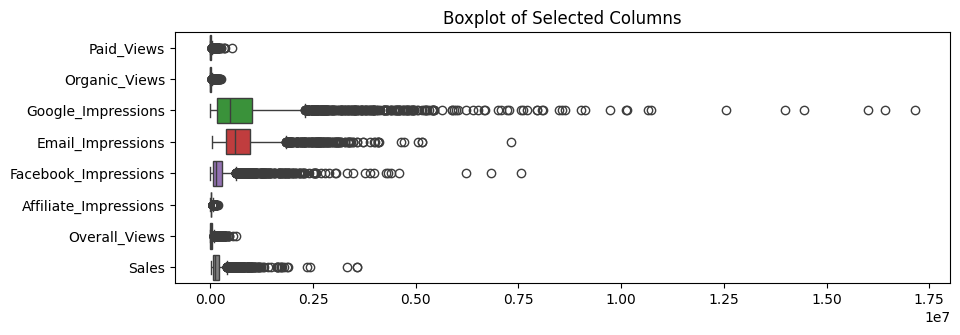

In [4]:
# Definisce i batch di colonne che verranno utilizzati per creare i boxplot.
# In questo caso, il primo batch include solo le colonne da 'Paid_Views' a 'Overall_Views'
column_batches = [df.columns[2:10]]  # Seleziona solo le colonne da 2 a 9 (come singolo batch)

# Imposta la dimensione complessiva della figura (larghezza 10, altezza 15 pollici)
plt.figure(figsize=(10,15))  

# Ciclo su ogni batch di colonne nella lista 'column_batches'
for n, i in enumerate(column_batches):  
    # Crea una subplot per ogni batch di colonne (fino a 4 righe, 1 per ogni batch)
    plt.subplot(4, 1, n + 1)  
    
    # Crea il boxplot per il batch corrente (orientamento orizzontale)
    sns.boxplot(df[i], orient="h")
    
plt.title("Boxplot of Selected Columns")
plt.show()

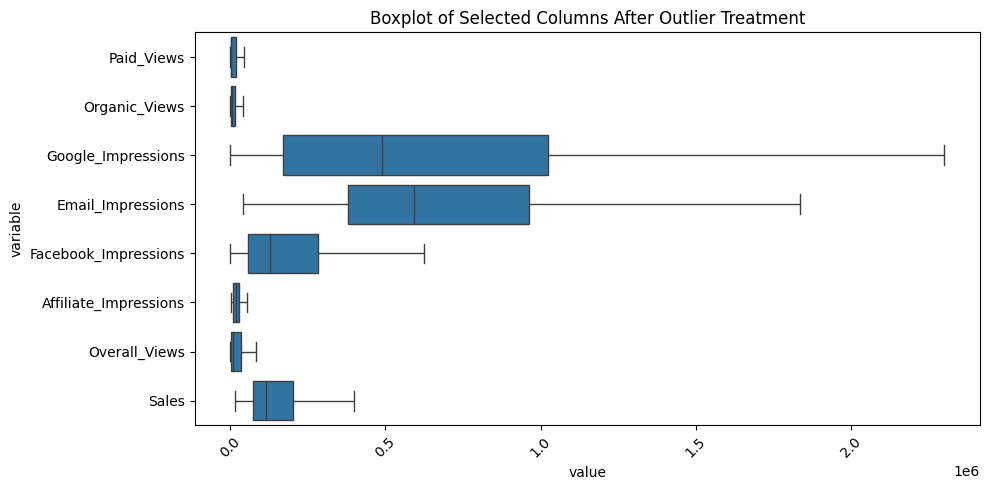

In [24]:
def treat_outliers(df_in, col):
    # Copia il DataFrame per non sovrascrivere i dati originali
    df_out = df_in.copy()
    # Calcola il primo e terzo quartile
    q1 = df_out[col].quantile(0.25)
    q3 = df_out[col].quantile(0.75)
    # Calcola l'IQR
    iqr = q3 - q1
    # Calcola i limiti inferiori e superiori
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Tratta gli outliers: sostituisci i valori estremi
    df_out.loc[df_out[col] < lower_bound, col] = lower_bound
    df_out.loc[df_out[col] > upper_bound, col] = upper_bound

    return df_out

# Controllo se tutte le colonne sono numeriche
fields_to_outlier_treatment = df.columns[2:10]
df_numeric_columns = df[fields_to_outlier_treatment].select_dtypes(include=['number']).columns

# Applica il trattamento degli outliers a tutte le colonne numeriche selezionate
for col in df_numeric_columns:
    df = treat_outliers(df, col)

# Raccogliamo tutti i dati da plottare in un unico DataFrame "long" per il boxplot
df_long = pd.melt(df, value_vars=df_numeric_columns)

# Creazione di un singolo boxplot per tutte le colonne
plt.figure(figsize=(10, 5))  # Impostiamo una dimensione adeguata per il grafico

sns.boxplot(y='variable', x='value', data=df_long)  # Variabile sull'asse x e valori sull'asse y

# Impostiamo il titolo del grafico
plt.title("Boxplot of Selected Columns After Outlier Treatment")
plt.xticks(rotation=45)  # Ruotiamo le etichette delle colonne per migliorarne la leggibilità

# Mostra il grafico
plt.tight_layout()
plt.show()